# Carbon + 
0. Prerequisities
1. Data pre-processing and feature engineering
2. Visualization 
3. Exploratory analysis

Google Slides - https://docs.google.com/presentation/d/18ySA4V40iqT7bUT5-Phz6Eb73N8SURFQhbhChV0D-H4/edit#slide=id.gbb3da7b5ee_0_11

# Prereqisities

Import python libraries

In [1]:
import pandas as pd
import numpy as np
import json
import urllib.request
import pinyin
from itertools import compress
import pprint

import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
init_notebook_mode(connected=True)

Add credentials or tokens

In [4]:
# Token or credentials
MAPBOX_TOKEN = open('credentials/mapbox.txt').read().rstrip()

# Data pre-processing

## Data Aquisition

In [5]:
EMISSION_PATH = 'data/china_emission.xlsx'
SINK_PATH = 'data/省级碳汇和生态元数据.xlsx'
PP_PATH = 'data/china_stats_gov_provincial_data_master.xlsx'
GROUP_PATH = 'data/china_province_grouping.xlsx'
CHINA_GEOJSON = 'data/china-province-simplified.geojson'

Import spatial data

In [6]:
# Access China boundary data - geojson format
with open(CHINA_GEOJSON, 'r', encoding='UTF-8') as j:
     jdata = json.loads(j.read())

# Check the naming system
n_ROI = len(jdata['features']) # number of ROIs
locations = [k for k in range(n_ROI)]
text = [feat['properties']['NAME']  for feat in jdata['features'] if feat['id'] in locations] #province names
print(text)

['黑龙江', '新疆', '山西', '宁夏', '西藏', '山东', '河南', '江苏', '安徽', '湖北', '浙江', '江西', '湖南', '云南', '贵州', '福建', '广西', '广东', '海南', '吉林', '辽宁', '天津', '青海', '甘肃', '陕西', '内蒙古', '重庆', '河北', '上海', '北京', '台湾', '香港', '澳门', '四川']


Import other datasets

In [7]:
# Carbon emission
# Query values 
df_emission = pd.read_excel(EMISSION_PATH, 'master')
df_emission = df_emission[df_emission['type']=='总排放（万吨CO2）'].iloc[:,1:]
df_emission = df_emission.drop('type', axis=1)

# Add missing provinces 
df_emission_copy = df_emission
miss_ROIs = ['西藏自治区','香港','澳门','台湾']
df_emission_copy[miss_ROIs] = np.nan

# Calculate mean values 
emission_mean_copy = df_emission_copy.iloc[:, 1:].mean(axis=0)

In [8]:
df_emission_copy.head(5)

year          北京市         天津市          河北省          山西省       内蒙古自治区  \
0  1995   9232.17375  7422.71035  22646.58000  15815.08450   8845.96750   
1  1996  10032.30430  7088.99020  23298.03190  16342.31270   9632.59180   
2  1997   8137.48810  5707.96460  23131.88610  15436.10910  10197.03130   
3  1998   8412.40758  5722.20860  24381.18777  15324.20752   9691.40861   
4  1999   8819.74090  5917.96588  22881.64970  15107.01609  10163.57399   

           辽宁省          吉林省         黑龙江省          上海市  ...         云南省  \
0  25562.87545  11237.52620  15788.73080  12979.47660  ...  5358.06060   
1  25860.11260  12037.37370  16000.22420  13924.86700  ...  5785.00400   
2  20382.09015  10618.72430  13899.14300  10837.16380  ...  5768.34740   
3  20220.03964   9127.91791  14046.83351  11059.85559  ...  6678.09128   
4  20147.52592   9254.90345  12955.23442  11808.22980  ...  5342.98356   

          陕西省         甘肃省         青海省     宁夏回族自治区    新疆维吾尔自治区  西藏自治区  香港  澳门  \
0  7770.87608  6334.58952  1401.57520  1850.94660  7349.82850    NaN NaN NaN   
1  4303.84400  5928.05750  1343.37116  1944.77130  8478.65150    NaN NaN NaN   
2  6772.73130  5163.95592  1249.61128  1765.06630  6650.66930    NaN NaN NaN   
3  6739.13654  5176.09172  1213.23190  1845.25895  6832.31376    NaN NaN NaN   
4  5911.43233  5342.93854  1440.12580  1844.22232  6676.88178    NaN NaN NaN   

   台湾  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 35 columns]

In [9]:
# Carbon sink
# Query values 
df_sink = pd.read_excel(SINK_PATH,'碳汇')
df_sink = df_sink.T.reset_index()
df_sink.columns = ['year'] + list(df_sink.iloc[0, 1:])
df_sink = df_sink[1:]

# Add missing provinces 
df_sink_copy = df_sink
miss_ROIs = ['西藏自治区','香港','澳门','台湾']
df_sink_copy[miss_ROIs] = np.nan

# Calculate mean values 
sink_mean_copy = df_sink_copy.iloc[:, 1:].mean(axis=0)

In [10]:
df_sink_copy.head(5)

year      安徽省      北京市      福建省      甘肃省      广东省  广西壮族自治区      贵州省  \
1  2000  204.668   13.703  344.834   295.43  539.226  648.794  367.748   
2  2001  215.978  12.8396  394.308  297.629  564.038  666.918  394.682   
3  2002  241.682   16.207  373.604  356.756  555.619  664.355  402.728   
4  2003  223.649  18.0084  399.515  344.823  593.688  695.206  399.261   
5  2004  239.598  22.8204  394.776   346.81  559.371  629.166   386.93   

       海南省      河北省  ...      四川省      天津市 新疆维吾尔自治区      云南省      浙江省  \
1  98.0449  161.717  ...  748.065  7.99518  628.612  1037.67  273.184   
2  97.1921  164.951  ...  746.576  9.27595  638.235  1061.62  304.298   
3  98.4496   178.21  ...  804.863  9.30835  680.151  1094.12  291.679   
4  103.995  202.982  ...  801.633  9.68123  737.529  1116.55  284.821   
5  103.498   246.45  ...  776.752  14.3333  698.271  1023.04  302.991   

       重庆市 西藏自治区  香港  澳门  台湾  
1  126.315   NaN NaN NaN NaN  
2  126.546   NaN NaN NaN NaN  
3  140.302   NaN NaN NaN NaN  
4  134.432   NaN NaN NaN NaN  
5  136.729   NaN NaN NaN NaN  

[5 rows x 35 columns]

In [11]:
# Census data
df_PP = pd.read_excel(PP_PATH)

# Add missing provinces 
df_PP_copy = df_PP
miss_ROIs = ['香港','澳门','台湾']
df_PP_copy[miss_ROIs] = np.nan

In [12]:
df_PP_copy.head(5)

uid lv1              lv2       lv3       lv4  year   北京市   天津市    河北省  \
0    0  人口  人口出生率、死亡率和自然增长率  人口出生率(‰)  人口出生率(‰)  2019  8.12  6.73  10.83   
1    1  人口  人口出生率、死亡率和自然增长率  人口出生率(‰)  人口出生率(‰)  2018  8.24  6.67  11.26   
2    2  人口  人口出生率、死亡率和自然增长率  人口出生率(‰)  人口出生率(‰)  2017  9.06  7.65  13.20   
3    3  人口  人口出生率、死亡率和自然增长率  人口出生率(‰)  人口出生率(‰)  2016  9.32  7.37  12.42   
4    4  人口  人口出生率、死亡率和自然增长率  人口出生率(‰)  人口出生率(‰)  2015  7.96  5.84  11.35   

     山西省  ...    云南省  西藏自治区    陕西省    甘肃省    青海省  宁夏回族自治区  新疆维吾尔自治区  香港  澳门  \
0   9.12  ...  12.63  14.60  10.55  10.60  13.66    13.72      8.14 NaN NaN   
1   9.63  ...  13.19  15.22  10.67  11.07  14.31    13.32     10.69 NaN NaN   
2  11.06  ...  13.53  16.00  11.11  12.54  14.42    13.44     15.88 NaN NaN   
3  10.29  ...  13.16  15.79  10.64  12.18  14.70    13.69     15.34 NaN NaN   
4   9.98  ...  12.88  15.75  10.10  12.36  14.72    12.62     15.59 NaN NaN   

   台湾  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 40 columns]

In [13]:
for i in range(1, 5):
    print('lv{}: \n{}\n'.format(i,set(df_PP_copy[df_PP_copy.columns[i]])))

lv1: 
{'固定资产投资和房地产', '综合', '农业', '财政', '建筑业', '人民生活', '能源', '国民经济核算', '价格指数', '就业人员和工资', '运输和邮电', '城市概况', '资源和环境', '对外经济贸易', '工业', '人口'}

lv2: 
{'能源工业固定资产投资(不含农户)', '草原建设利用', '突发环境事件情况', '按行业分固定资产投资(不含农户)', '房地产开发企业投资总规模及完成情况', '城市建设', '人口抽样调查样本数据', '固定资产投资(不含农户)新增固定资产及交付使用率', '农村居民家庭住房情况（老口径）', '果园面积', '房地产开发企业成套住宅竣工与销售情况', '全社会建设总规模', '能源消耗指标', '城市绿地和园林', '建筑业企业利润总额', '按用途分商品房平均销售价格', '城镇居民家庭平均每百户耐用消费品拥有量（老口径）', '私人汽车拥有量', '按行业分城镇私营单位就业人员平均工资', '按来源分农村居民家庭人均纯收入（老口径）', '有效灌溉面积、农用化肥施用量、农村水电站及用电量', '房地产开发企业房屋建筑面积和造价', '自然保护基本情况', '废气中主要污染物排放', '全社会住宅投资', '建筑业企业技术装备情况', '农、林、牧、渔业总产值及指数', '按用途分商品房销售面积', '工业生产者出厂价格指数(上年=100)', '城镇单位就业人员平均工资和指数', '大中型工业企业主要经济指标', '商品零售价格分类指数(上年=100)', '按项目规模分房地产开发完成投资', '主要有色金属、非金属矿产基础储量', '固定资产投资(不含农户)资金来源', '农村居民家庭平均每人出售主要畜产品及水产品', '按登记注册类型分建筑业企业单位数', '城市燃气', '按登记注册类型分建筑业企业总收入', '按登记注册类型分建筑业企业资产', '主要农作物产品产量', '水利设施和除涝面积', '畜产品产量', '支出法地区生产总值', '建筑业房屋建筑面积', '农村商品零售价格指数(上年=100)', '居民消费价格分类指数(上年=100)(-2015)', '按登记注册类型分建筑业企业从业人员', '茶园面积', '民用汽车拥有量', '城市能源产品供

In [14]:
fids_lv4 = list(set(df_PP_copy[df_PP_copy.columns[4]]))
sel = ['生产总值' in i for i in set(df_PP_copy[df_PP_copy.columns[4]])]
re = list(compress(fids_lv4, sel))
re

['单位地区生产总值电耗(等价值)(千瓦小时per万元)',
 '收入法生产总值(亿元)',
 '人均地区生产总值(元per人)',
 '单位地区生产总值能耗(等价值)(吨标准煤per万元)',
 '地区生产总值指数(上年=100)',
 '支出法生产总值(亿元)',
 '地区生产总值(亿元)']

In [15]:
# Spatial clusters
df_group = pd.read_excel(GROUP_PATH)
df_group_copy = df_group
df_group_copy.columns = df_group_copy.columns.drop('Province').insert(0, 'name')
df_group_copy.head(5)

name 常规分类  热点地区1 热点地区2 八大经济区域  三大地带
0     北京市   华北  环渤海地区  东部地区   北部沿海  东部地带
1     天津市   华北  环渤海地区  东部地区   北部沿海  东部地带
2     河北省   华北  环渤海地区  东部地区   北部沿海  东部地带
3     山西省   华北    NaN   NaN   黄河中游  中部地带
4  内蒙古自治区   华北    NaN  西部地区   黄河中游  西部地带

Standerdize province names, units, add missing provinces or regions, and sort by values.

In [18]:
# TO BE DONE

Unify datasets

In [19]:
# TO BE DONE

## Data overview and inspection

### Time series 

No handles with labels found to put in legend.


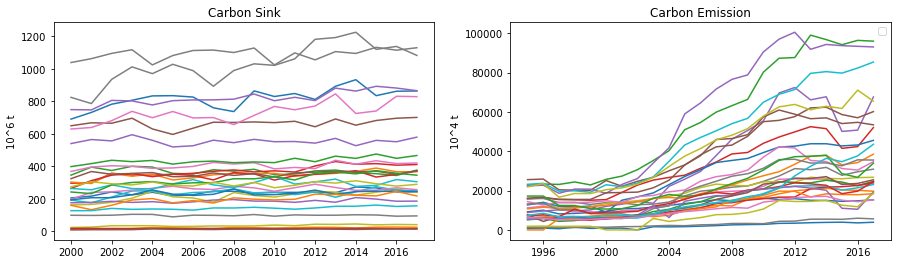

In [16]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# fig, (ax1, ax2) = plt.subplots(1, 2)

for i in range(df_sink.shape[1]-1):
    ax1.plot(pd.to_datetime(df_sink['year'], format='%Y'), df_sink.iloc[:, i+1])
    
ax1.set_ylabel('10^6 t')
ax1.set_title('Carbon Sink')
# ax1.legend()

for i in range(df_emission.shape[1]-1):
    ax2.plot(pd.to_datetime(df_emission['year'], format='%Y'), df_emission.iloc[:, i+1])
    
ax2.set_ylabel('10^4 t')
ax2.set_title('Carbon Emission')
ax2.legend()

plt.show()

### Time Series Per Province

In [19]:
NAMES = df_sink.columns[1:]

def f(province):
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.plot(pd.to_datetime(df_sink['year'], format='%Y'), df_sink[province])
    ax1.set_xlabel('Year')
    ax1.set_ylabel('10^6 t')
    ax1.set_title('Carbon Sink in {}'.format(pinyin.get(province, format="strip", delimiter="")))
    
    ax2.plot(pd.to_datetime(df_emission['year'], format='%Y'), df_emission[province])
    ax2.set_xlabel('Year')
    ax2.set_ylabel('10^4 t')
    ax2.set_title('Carbon Emission in {}'.format(pinyin.get(province, format="strip", delimiter="")))

a = interact(f, province=NAMES)

interactive(children=(Dropdown(description='province', options=('安徽省', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', …

#### Interactively plots using plotly

In [20]:
def f(province):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=df_sink['year'], y=df_sink[province], 
                    mode='lines+markers', name='Carbon Sink'))
    fig.add_trace(go.Scatter(x=df_emission['year'], y=df_emission[province], 
                    mode='lines+markers', name='Carbon Emission'), secondary_y=True)
    
    # Add figure title
    fig.update_layout(
        title_text="Carbon Sink and Emission in <b>{}</b>".format(province)
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Year")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>Carbon Sink</b> 10^6 t", secondary_y=False)
    fig.update_yaxes(title_text="<b>Carbon Emission</b> 10^4 t", secondary_y=True)

    fig.show()

NAMES = df_sink.columns[1:]
a = interact(f, province=NAMES)

interactive(children=(Dropdown(description='province', options=('安徽省', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', …

### Spatial distribution of carbon sink and emission

reference: https://chart-studio.plotly.com/~empet/15238/tips-to-extract-data-from-a-geojson-di/#/

#### Average

In [21]:
# Harmonize carbon sink and emission file and geojson file
def harm(df):
    z = df.reset_index()
    z.columns = ['name', 'value']
    z['location_idx'] = [np.nan]*len(z)

    for loc_idx, loc_name in enumerate(text):
        for df_idx, df_name in enumerate(z['name']):
            if (loc_name in df_name) | (df_name in loc_name):
                z.loc[df_idx, 'location_idx'] = loc_idx
    
    return z.set_index('location_idx').sort_index()

# Plot map
fig= go.Figure(go.Choroplethmapbox(z=harm(sink_mean_copy)['value'],
                            locations=locations,
                            colorscale='greens',
                            colorbar=dict(thickness=20, ticklen=3),
                            geojson=jdata,
                            text=text,
                            hoverinfo='all',
                            marker_line_width=1, marker_opacity=0.75))
                            
                            
fig.update_layout(title_text= 'Mean Carbon Sink from 2000 to 2017',
                  title_x=0.5, width = 700,# height=700,
                  mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                 accesstoken= MAPBOX_TOKEN,
                                 style='basic',
                                 zoom=2.35,
                               ));

fig.data[0].hovertemplate =  '<b>Province</b>: <b>%{text}</b>'+\
                              '<br> <b>Val </b>: %{z}<br>'
iplot(fig)

# Emission
fig= go.Figure(go.Choroplethmapbox(z=harm(emission_mean_copy)['value'],
                            locations=locations,
                            colorscale='reds',
                            colorbar=dict(thickness=20, ticklen=3),
                            geojson=jdata,
                            text=text,
                            hoverinfo='all',
                            marker_line_width=1, marker_opacity=0.75))
                            
                            
fig.update_layout(title_text= 'Mean Carbon Emission from 1995 to 2017',
                  title_x=0.5, width = 700,# height=700,
                  mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                 accesstoken= MAPBOX_TOKEN,
                                 style='basic',
                                 zoom=2.35,
                               ));

fig.data[0].hovertemplate =  '<b>Province</b>: <b>%{text}</b>'+\
                              '<br> <b>Val </b>: %{z}<br>'
iplot(fig)

#### Annual

In [22]:
def harm_annual(df, year):
    z = df.loc[df['year']==int(year), df.columns[1:]].T.reset_index()
    z.columns = ['name', 'value']
    z['location_idx'] = [np.nan]*len(z)

    for loc_idx, loc_name in enumerate(text):
        for df_idx, df_name in enumerate(z['name']):
            if (loc_name in df_name) | (df_name in loc_name):
                z.loc[df_idx, 'location_idx'] = loc_idx

    return z.set_index('location_idx').sort_index()

def map_carbon(year):
    try:
        fig= go.Figure(go.Choroplethmapbox(z=harm_annual(df_sink_copy, year)['value'],
                                    locations=locations,
                                    colorscale='greens',
                                    colorbar=dict(thickness=20, ticklen=3),
                                    geojson=jdata,
                                    text=text,
                                    hoverinfo='all',
                                    marker_line_width=1, marker_opacity=0.75))


        fig.update_layout(title_text= 'Carbon sink (10^4 t) in {}'.format(year),
                          title_x=0.5, width = 700,# height=700,
                          mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                         accesstoken= MAPBOX_TOKEN,
                                         style='basic',
                                         zoom=2.35,
                                       ));

        fig.data[0].hovertemplate =  '<b>Province</b>: <b>%{text}</b>'+\
                                      '<br> <b>Val </b>: %{z}<br>'
        
        iplot(fig)
        
    except:
        print('No carbon sink data in {}'.format(year))

    try:
        # Emission
        fig= go.Figure(go.Choroplethmapbox(z=harm_annual(df_emission_copy, year)['value'],
                                    locations=locations,
                                    colorscale='reds',
                                    colorbar=dict(thickness=20, ticklen=3),
                                    geojson=jdata,
                                    text=text,
                                    hoverinfo='all',
                                    marker_line_width=1, marker_opacity=0.75))


        fig.update_layout(title_text= 'Carbon Emission (10^6 t) in {}'.format(year),
                          title_x=0.5, width = 700,# height=700,
                          mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                         accesstoken= MAPBOX_TOKEN,
                                         style='basic',
                                         zoom=2.35,
                                       ));

        fig.data[0].hovertemplate =  '<b>Province</b>: <b>%{text}</b>'+\
                                      '<br> <b>Val </b>: %{z}<br>'
        iplot(fig)
        
    except:
        print('No carbon emission data in {}'.format(year))

year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

a = interact(map_carbon, year=year)



interactive(children=(IntSlider(value=2017, continuous_update=False, description='Year', max=2017, min=1995), …

## Feature engineering

### Total and Net Carbon Emission per capita and/or per GDP

Calculate carbon flow from carbon sink dataset

In [23]:
df_flow = (df_sink_copy - df_sink_copy.shift()) * 44 / 12
df_flow['year'] = df_sink_copy['year'].values
df_flow = df_flow.iloc[1:, :].reset_index(drop=True)
df_flow_copy = df_flow
df_flow_copy.head(5)


year      安徽省      北京市      福建省      甘肃省      广东省  广西壮族自治区      贵州省  \
0  2001  41.4704 -3.16554  181.405  8.06164  90.9786  66.4539  98.7594   
1  2002  94.2492  12.3469  -75.916  216.798 -30.8723 -9.39508  29.5026   
2  2003 -66.1213  6.60525  95.0064 -43.7528  139.586  113.119 -12.7124   
3  2004  58.4789   17.644 -17.3772  7.28687 -125.829 -242.146 -45.2136   
4  2005 -80.3119 -6.08642 -142.986    11.28 -149.828 -123.559  8.83728   

       海南省      河北省  ...      四川省       天津市 新疆维吾尔自治区      云南省      浙江省  \
0 -3.12691  11.8549  ... -5.46241   4.69617  35.2842  87.8153  114.085   
1  4.61066  48.6198  ...  213.722  0.118772  153.693   119.16 -46.2706   
2  20.3317  90.8281  ... -11.8444   1.36725  210.384  82.2416 -25.1475   
3 -1.82207  159.382  ... -91.2293   17.0577 -143.945 -342.863  66.6231   
4 -56.0085 -126.151  ...   96.642    -10.07   139.65  211.366  -84.727   

        重庆市 西藏自治区  香港  澳门  台湾  
0  0.845945   NaN NaN NaN NaN  
1   50.4416   NaN NaN NaN NaN  
2  -21.5259   NaN NaN NaN NaN  
3   8.42407   NaN NaN NaN NaN  
4  -6.19442   NaN NaN NaN NaN  

[5 rows x 35 columns]

In [24]:
# Average carbon flow from 2001 to 2017
flow_mean_copy = df_flow_copy.iloc[:, 1:].mean(axis=0)
flow_mean_copy

安徽省          8.040262
北京市          2.267475
福建省          6.712972
甘肃省         24.736022
广东省          8.508283
广西壮族自治区     11.065988
贵州省         11.218788
海南省         -0.826242
河北省         16.687036
河南省         12.154518
黑龙江省        37.348017
湖北省         13.738995
湖南省         14.748243
吉林省         23.043358
江苏省          2.234427
江西省         10.545488
辽宁省         12.802644
内蒙古自治区      55.658947
宁夏回族自治区      3.734196
青海省          9.001057
山东省         10.999058
山西省         12.388809
陕西省         22.231045
上海市         -0.310367
四川省         25.121031
天津市          1.121139
新疆维吾尔自治区    42.948920
云南省         19.659246
浙江省          3.251571
重庆市          6.429156
西藏自治区             NaN
香港                NaN
澳门                NaN
台湾                NaN
dtype: float64

In [25]:
provinces = ['year'] + df_emission_copy.columns.drop('year').to_list()
df_emission_01 = df_emission_copy.iloc[6:, :].reindex(provinces, axis=1).reset_index(drop=True)
df_flow_01 = df_flow_copy.reindex(provinces, axis=1).reset_index(drop=True)

In [26]:
df_emission_01

year           北京市           天津市           河北省           山西省  \
0   2001  10734.247898   6756.515270  27349.159430  19067.916030   
1   2002  10883.469826   7403.087850  30652.068790  22805.741360   
2   2003  11591.269068   7577.162900  35287.297880  25319.971790   
3   2004  12479.526260   8697.016840  40272.887762  26691.521360   
4   2005  13412.810121  10326.836697  50929.338237  27805.903490   
5   2006  14283.429647  11428.108623  54617.364065  31320.525190   
6   2007  15351.816267  12594.457152  59879.216520  34520.530600   
7   2008  14822.840008  12152.847468  63162.649295  38627.064470   
8   2009  15328.976404  15486.175661  66359.053090  39375.283270   
9   2010  16150.384575  16535.453214  80181.155031  44027.461500   
10  2011  15464.180103  18354.204940  87273.131541  47232.980441   
11  2012  15904.279146  19873.630386  87635.156775  49827.665078   
12  2013  15058.172330  20582.117266  99026.685835  52487.750932   
13  2014  14959.136700  21156.274362  96761.112782  51475.343716   
14  2015  14543.115190  20345.998139  94160.413769  41457.310029   
15  2016  14789.306630  20114.038353  96369.928206  42368.261061   
16  2017  15295.176345  19689.041685  95954.368973  52039.624026   

          内蒙古自治区           辽宁省           吉林省          黑龙江省           上海市  ...  \
0   13069.100813  22174.198874   9786.637531  13696.562663  14105.641624  ...   
1   14524.728569  24738.779201  10098.129340  12797.425111  14877.272727  ...   
2   13558.124645  26756.575140  11205.805414  13114.482954  15924.876634  ...   
3   22149.737824  30038.338090  12244.470629  14174.928922  17098.633912  ...   
4   25806.006661  33036.035415  16019.349214  17288.382818  18641.638377  ...   
5   29704.696660  38136.083408  17765.495972  19691.525991  21515.224117  ...   
6   37820.670984  42218.625283  19321.204993  20499.742279  23275.915451  ...   
7   46103.745054  43128.727679  19659.702503  21715.150069  22672.784937  ...   
8   50544.709711  47600.399245  20016.670855  22333.189846  22362.839339  ...   
9   55444.073205  55031.658329  22201.128620  24694.885590  24394.249803  ...   
10  69609.627160  55707.027686  25777.059375  27413.810290  24555.754365  ...   
11  72401.156311  57608.623852  25958.559342  31170.608595  24327.641933  ...   
12  66129.401813  62045.682526  25894.235673  30612.152127  26765.588804  ...   
13  67702.316736  62374.919074  25788.950882  31795.499077  26214.389103  ...   
14  50081.315008  58657.067513  23654.704626  27784.262320  25993.405361  ...   
15  50745.955323  57024.246723  22650.521963  29569.023925  26589.718812  ...   
16  67578.192302  60155.081666  23530.880063  30885.877930  26753.787151  ...   

             云南省           陕西省           甘肃省          青海省       宁夏回族自治区  \
0    6505.517170   6243.398220   5938.819434  1638.057120      0.000000   
1    7548.459500   7704.500460   6396.366816  1706.581950      0.000000   
2   12338.701941   8153.363750   7357.083507  2042.689070   5812.129440   
3    6277.989515  10128.312150   8400.670621  2277.467379   4306.639206   
4   14563.819958  11356.293819   9294.630299  2141.665721   5339.135307   
5   16086.697269  12773.279535   9973.995720  2589.756820   6253.279287   
6   17434.005942  15499.270165  10753.752558  2739.773449   7755.352786   
7   17394.889581  17248.477880  11441.783827  3273.446949   7896.593133   
8   20051.146524  18958.847709  11059.731880  3302.511380   8682.392648   
9   20672.833920  23292.257854  14127.660155  3171.701888  10616.310063   
10  21504.833020  24093.276243  15037.352537  4376.001777  14944.396150   
11  22107.323207  26326.618746  16387.051049  4473.445975  14444.677322   
12  21277.846378  26143.179504  16855.663976  5449.351234  14508.926910   
13  20155.528864  27089.784011  17082.305287  5469.562403  15070.185250   
14  11009.629479  23092.511605  15088.706535  5388.712125  12572.584910   
15  10496.348243  23646.216675  14362.920818  5952.724560  11777.791500   
16  19279.958978  25475.426995  15278.298983 

In [27]:
# Calculate net carbon emission  

# Sunstract mean carbon flow from 2001 to 2017 from anual carbon emission
df_net_01 = df_emission_01
for x in df_emission_01.columns.drop('year'):
    df_net_01[x] = df_emission_01[x] - df_flow_copy[x].mean() * 100

# Substract annual carbon flow from annual carbon emission
# df_net_01 = df_emission_01.iloc[:, 1:] - df_flow_01.iloc[:, 1:] * 100
# df_net_01 = df_net_01.set_index(df_emission_01.year).reset_index()

df_net_01

year           北京市           天津市           河北省           山西省  \
0   2001  10507.500447   6644.401387  25680.455871  17829.035146   
1   2002  10656.722376   7290.973967  28983.365231  21566.860476   
2   2003  11364.521618   7465.049017  33618.594321  24081.090906   
3   2004  12252.778810   8584.902957  38604.184204  25452.640476   
4   2005  13186.062670  10214.722813  49260.634679  26567.022606   
5   2006  14056.682197  11315.994739  52948.660506  30081.644306   
6   2007  15125.068817  12482.343269  58210.512962  33281.649716   
7   2008  14596.092558  12040.733585  61493.945737  37388.183586   
8   2009  15102.228954  15374.061778  64690.349531  38136.402386   
9   2010  15923.637125  16423.339330  78512.451473  42788.580616   
10  2011  15237.432652  18242.091057  85604.427982  45994.099557   
11  2012  15677.531696  19761.516503  85966.453216  48588.784193   
12  2013  14831.424880  20470.003382  97357.982276  51248.870047   
13  2014  14732.389250  21044.160479  95092.409223  50236.462832   
14  2015  14316.367740  20233.884256  92491.710210  40218.429145   
15  2016  14562.559180  20001.924470  94701.224647  41129.380177   
16  2017  15068.428895  19576.927802  94285.665415  50800.743142   

          内蒙古自治区           辽宁省           吉林省          黑龙江省           上海市  ...  \
0    7503.206135  20893.934519   7482.301681   9961.760922  14136.678355  ...   
1    8958.833891  23458.514847   7793.793490   9062.623371  14908.309458  ...   
2    7992.229967  25476.310786   8901.469564   9379.681214  15955.913366  ...   
3   16583.843146  28758.073736   9940.134779  10440.127181  17129.670643  ...   
4   20240.111983  31755.771061  13715.013364  13553.581077  18672.675108  ...   
5   24138.801982  36855.819054  15461.160122  15956.724251  21546.260848  ...   
6   32254.776306  40938.360929  17016.869143  16764.940538  23306.952182  ...   
7   40537.850376  41848.463325  17355.366653  17980.348329  22703.821668  ...   
8   44978.815033  46320.134891  17712.335006  18598.388106  22393.876070  ...   
9   49878.178527  53751.393975  19896.792771  20960.083850  24425.286534  ...   
10  64043.732482  54426.763332  23472.723526  23679.008549  24586.791096  ...   
11  66835.261633  56328.359498  23654.223492  27435.806855  24358.678665  ...   
12  60563.507135  60765.418172  23589.899823  26877.350386  26796.625535  ...   
13  62136.422059  61094.654720  23484.615032  28060.697337  26245.425834  ...   
14  44515.420330  57376.803159  21350.368776  24049.460579  26024.442092  ...   
15  45180.060645  55743.982369  20346.186113  25834.222184  26620.755543  ...   
16  62012.297624  58874.817312  21226.544213  27151.076189  26784.823882  ...   

             云南省           陕西省           甘肃省          青海省       宁夏回族自治区  \
0    4539.592596   4020.293767   3465.217275   737.951443   -373.419580   
1    5582.534926   5481.396007   3922.764657   806.476273   -373.419580   
2   10372.777368   5930.259297   4883.481348  1142.583393   5438.709860   
3    4312.064942   7905.207697   5927.068462  1377.361702   3933.219626   
4   12597.895384   9133.189366   6821.028140  1241.560043   4965.715727   
5   14120.772696  10550.175081   7500.393561  1689.651143   5879.859708   
6   15468.081369  13276.165711   8280.150399  1839.667771   7381.933207   
7   15428.965008  15025.373427   8968.181668  2373.341272   7523.173553   
8   18085.221950  16735.743255   8586.129721  2402.405703   8308.973068   
9   18706.909347  21069.153401  11654.057996  2271.596211  10242.890483   
10  19538.908447  21870.171790  12563.750378  3475.896099  14570.976570   
11  20141.398634  24103.514293  13913.448890  3573.340298  14071.257742   
12  19311.921804  23920.075050  14382.061817  4549.245557  14135.507330   
13  18189.604291  24866.679558  14608.703128  4569.456725  14696.765670   
14   9043.704905  20869.407152  12615.104376  4488.606448  12199.165330   
15   8530.423670  21423.112222  11889.318659  5052.618883  11404.371920   
16  17314.034404  23252.322542  12804.696824 

Total and net Carbon Emission per capita and GDP per capita

In [28]:
# Query GDP and population from 2001 to 2017
START_YEAR = 2001
END_YEAR = 2017
df_gdpTotal_all =  df_PP_copy.loc[(df_PP_copy['lv4']=='地区生产总值(亿元)'), df_PP_copy.columns[5:]].reset_index(drop=True)
df_gdpTotal_01 = df_PP_copy.loc[(df_PP_copy['lv4']=='地区生产总值(亿元)') & (df_PP_copy['year']<=END_YEAR) & (df_PP_copy['year']>=START_YEAR), df_PP_copy.columns[5:]].reset_index(drop=True)
df_gdpTotal_01

year       北京市       天津市       河北省       山西省    内蒙古自治区       辽宁省  \
0   2017  28014.94  18549.19  34016.32  15528.42  16096.21  23409.24   
1   2016  25669.13  17885.39  32070.45  13050.41  18128.10  22246.90   
2   2015  23014.59  16538.19  29806.11  12766.49  17831.51  28669.02   
3   2014  21330.83  15726.93  29421.15  12761.49  17770.19  28626.58   
4   2013  19800.81  14442.01  28442.95  12665.25  16916.50  27213.22   
5   2012  17879.40  12893.88  26575.01  12112.83  15880.58  24846.43   
6   2011  16251.93  11307.28  24515.76  11237.55  14359.88  22226.70   
7   2010  14113.58   9224.46  20394.26   9200.86  11672.00  18457.27   
8   2009  12153.03   7521.85  17235.48   7358.31   9740.25  15212.49   
9   2008  11115.00   6719.01  16011.97   7315.40   8496.20  13668.58   
10  2007   9846.81   5252.76  13607.32   6024.45   6423.18  11164.30   
11  2006   8117.78   4462.74  11467.60   4878.61   4944.25   9304.52   
12  2005   6969.52   3905.64  10012.11   4230.53   3905.03   8047.26   
13  2004   6033.21   3110.97   8477.63   3571.37   3041.07   6672.00   
14  2003   5007.21   2578.03   6921.29   2855.23   2388.38   6002.54   
15  2002   4315.00   2150.76   6018.28   2324.80   1940.94   5458.22   
16  2001   3707.96   1919.09   5516.76   2029.53   1713.81   5033.08   

         吉林省      黑龙江省       上海市  ...       云南省    西藏自治区       陕西省      甘肃省  \
0   14944.53  15902.68  30632.99  ...  16376.34  1310.92  21898.81  7459.90   
1   14776.80  15386.09  28178.65  ...  14788.42  1151.41  19399.59  7200.37   
2   14063.13  15083.67  25123.45  ...  13619.17  1026.39  18021.86  6790.32   
3   13803.14  15039.38  23567.70  ...  12814.59   920.83  17689.94  6836.82   
4   13046.40  14454.91  21818.15  ...  11832.31   815.67  16205.45  6330.69   
5   11939.24  13691.58  20181.72  ...  10309.47   701.03  14453.68  5650.20   
6   10568.83  12582.00  19195.69  ...   8893.12   605.83  12512.30  5020.37   
7    8667.58  10368.60  17165.98  ...   7224.18   507.46  10123.48  4120.75   
8    7278.75   8587.00  15046.45  ...   6169.75   441.36   8169.80  3387.56   
9    6426.10   8314.37  14069.86  ...   5692.12   394.85   7314.58  3166.82   
10   5284.69   7104.00  12494.01  ...   4772.52   341.43   5757.29  2703.98   
11   4275.12   6211.80  10572.24  ...   3988.14   290.76   4743.61  2277.35   
12   3620.27   5513.70   9247.66  ...   3462.73   248.80   3933.72  1933.98   
13   3122.01   4750.60   8072.83  ...   3081.91   220.34   3175.58  1688.49   
14   2662.08   4057.40   6694.23  ...   2556.02   185.09   2587.72  1399.83   
15   2348.54   3637.20   5741.03  ...   2312.82   162.04   2253.39  1232.03   
16   2120.35   3390.10   5210.12  ...   2138.31   139.16   2010.62  1125.37   

        青海省  宁夏回族自治区  新疆维吾尔自治区  香港  澳门  台湾  
0   2624.83  3443.56  10881.96 NaN NaN NaN  
1   2572.49  3168.59   9649.70 NaN NaN NaN  
2   2417.05  2911.77   9324.80 NaN NaN NaN  
3   2303.32  2752.10   9273.46 NaN NaN NaN  
4   2122.06  2577.57   8443.84 NaN NaN NaN  
5   1893.54  2341.29   7505.31 NaN NaN NaN  
6   1670.44  2102.21   6610.05 NaN NaN NaN  
7   1350.43  1689.65   5437.47 NaN NaN NaN  
8   1081.27  1353.31   4277.05 NaN NaN NaN  
9   1018.62  1203.92   4183.21 NaN NaN NaN  
10   797.35   919.11   3523.16 NaN NaN NaN  
11   648.50   725.90   3045.26 NaN NaN NaN  
12   543.32   612.61   2604.19 NaN NaN NaN  
13   466.10   537.11   2209.09 NaN NaN NaN  
14   390.20   445.36   1886.35 NaN NaN NaN  
15   340.65   377.16   1612.65 NaN NaN NaN  
16   300.13   337.44   1491.60 NaN NaN NaN  

[17 rows x 35 columns]

In [29]:
df_pop_all = df_PP_copy.loc[(df_PP_copy['lv3']=='人口数(人口抽样调查)') & (df_PP_copy['lv4']=='人口数(人口抽样调查)(人)'), df_PP_copy.columns[5:]].reset_index(drop=True)
df_pop_01 = df_PP_copy.loc[(df_PP_copy['lv3']=='人口数(人口抽样调查)') & (df_PP_copy['lv4']=='人口数(人口抽样调查)(人)') & (df_PP_copy['year']<=END_YEAR) & (df_PP_copy['year']>=START_YEAR), df_PP_copy.columns[5:]].reset_index(drop=True)
df_pop_01

year       北京市       天津市        河北省       山西省    内蒙古自治区       辽宁省  \
0   2017   17801.0   12778.0    62086.0   30550.0   20849.0   35969.0   
1   2016   18132.0   13046.0    62750.0   30910.0   21136.0   36668.0   
2   2015  335775.0  239370.0  1155542.0  569491.0  390222.0  680859.0   
3   2014   17757.0   12517.0    60936.0   30107.0   20671.0   36236.0   
4   2013   17454.0   12150.0    60517.0   29957.0   20613.0   36231.0   
5   2012   17266.0   11791.0    60806.0   30128.0   20775.0   36621.0   
6   2011   17246.0   11577.0    61861.0   30698.0   21203.0   37447.0   
7   2009   15096.0   10473.0    62243.0   30378.0   21499.0   38429.0   
8   2008   14813.0   10114.0    62981.0   30779.0   21816.0   38988.0   
9   2007   14554.0    9896.0    63501.0   31069.0   22066.0   39317.0   
10  2006   14294.0    9694.0    63675.0   31182.0   22180.0   39231.0   
11  2005  203582.0  138060.0   906856.0  444096.0  315884.0  558727.0   
12  2004   14213.0    9868.0    66078.0   32352.0   23233.0   41100.0   
13  2003   14070.0    9956.0    66569.0   32558.0   23510.0   41549.0   
14  2002   13723.0    9961.0    66463.0   32455.0   23586.0   41608.0   

         吉林省      黑龙江省       上海市  ...       云南省    西藏自治区       陕西省       甘肃省  \
0    22424.0   31251.0   19826.0  ...   39709.0   2797.0   31649.0   21720.0   
1    22945.0   31874.0   20188.0  ...   40141.0   2789.0   32014.0   21960.0   
2   428511.0  592705.0  373956.0  ...  738612.0  50634.0  589346.0  404863.0   
3    22715.0   31632.0   20019.0  ...   38902.0   2620.0   31155.0   21381.0   
4    22707.0   31651.0   19932.0  ...   38680.0   2575.0   31063.0   21311.0   
5    22949.0   31990.0   19862.0  ...   38874.0   2567.0   31315.0   21507.0   
6    23490.0   32757.0   20056.0  ...   39564.0   2591.0   31976.0   21908.0   
7    24349.0   34065.0   16814.0  ...   40460.0   2556.0   33504.0   23405.0   
8    24764.0   34688.0   16854.0  ...   40947.0   2576.0   33999.0   23739.0   
9    25067.0   35193.0   16708.0  ...   41269.0   2587.0   34383.0   23990.0   
10   25243.0   35504.0   16525.0  ...   41359.0   2574.0   34574.0   24109.0   
11  359512.0  505647.0  235351.0  ...  589039.0  36666.0  492410.0  343364.0   
12   26397.0   37241.0   16702.0  ...   42720.0   2636.0   36022.0   25409.0   
13   26684.0   37693.0   16061.0  ...   42836.0   2638.0   36314.0   25628.0   
14   26693.0   37806.0   16012.0  ...   42529.0   2609.0   36297.0   25546.0   

        青海省   宁夏回族自治区  新疆维吾尔自治区  香港  澳门  台湾  
0    4939.0    5627.0   20210.0 NaN NaN NaN  
1    4987.0    5666.0   20165.0 NaN NaN NaN  
2   91611.0  103820.0  367631.0 NaN NaN NaN  
3    4814.0    5460.0   18969.0 NaN NaN NaN  
4    4769.0    5399.0   18688.0 NaN NaN NaN  
5    4782.0    5400.0   18630.0 NaN NaN NaN  
6    4854.0    5463.0   18871.0 NaN NaN NaN  
7    4934.0    5504.0   18979.0 NaN NaN NaN  
8    5007.0    5533.0   19004.0 NaN NaN NaN  
9    5045.0    5560.0   18872.0 NaN NaN NaN  
10   5049.0    5539.0   18681.0 NaN NaN NaN  
11  71903.0   78892.0  265815.0 NaN NaN NaN  
12   5213.0    5662.0   18880.0 NaN NaN NaN  
13   5225.0    5650.0   18834.0 NaN NaN NaN  
14   5189.0    5585.0   19799.0 NaN NaN NaN  

[15 rows x 35 columns]

In [30]:
# Net carbon emission per capita
df_net_01_perCap = (df_net_01.set_index('year') / df_pop_01.set_index('year')).reset_index()
df_net_01_perCap_copy = df_net_01_perCap
df_net_01_perCap_copy

year       上海市       云南省    内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   2001       NaN       NaN       NaN       NaN NaN       NaN       NaN   
1   2002  0.931071  0.131264  0.379837  0.776559 NaN  0.291979  0.115944   
2   2003  0.993457  0.242151  0.339950  0.807713 NaN  0.333588  0.158300   
3   2004  1.025606  0.100938  0.713805  0.862083 NaN  0.376563  0.182578   
4   2005  0.079340  0.021387  0.064075  0.064770 NaN  0.038149  0.013364   
5   2006  1.303858  0.341420  1.088314  0.983397 NaN  0.612493  0.197754   
6   2007  1.394958  0.374811  1.461741  1.039238 NaN  0.678855  0.243586   
7   2008  1.347088  0.376803  1.858171  0.985357 NaN  0.700831  0.285024   
8   2009  1.331859  0.446990  2.092135  1.000413 NaN  0.727436  0.327523   
9   2010       NaN       NaN       NaN       NaN NaN       NaN       NaN   
10  2011  1.225907  0.493856  3.020503  0.883534 NaN  0.999265  0.477523   
11  2012  1.226396  0.518120  3.217100  0.908000 NaN  1.030730  0.515269   
12  2013  1.344402  0.499274  2.938122  0.849744 NaN  1.038882  0.522543   
13  2014  1.311026  0.467575  3.005971  0.829667 NaN  1.033881  0.527233   
14  2015  0.069592  0.012244  0.114077  0.042637 NaN  0.049825  0.020419   
15  2016  1.318643  0.212511  2.137588  0.803141 NaN  0.886737  0.348276   
16  2017  1.350995  0.436023  2.974354  0.846493 NaN  0.946599  0.458163   

         天津市   宁夏回族自治区  ...       甘肃省       福建省  西藏自治区       贵州省       辽宁省  \
0        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
1   0.731952 -0.066861  ...  0.153557  0.186405    NaN  0.221248  0.563798   
2   0.749804  0.962604  ...  0.190553  0.252276    NaN  0.287988  0.613163   
3   0.869974  0.694670  ...  0.233266  0.288525    NaN  0.324922  0.699710   
4   0.073988  0.062943  ...  0.019865  0.026383    NaN  0.029180  0.056836   
5   1.167319  1.061538  ...  0.311103  0.414984    NaN  0.487713  0.939457   
6   1.261352  1.327686  ...  0.345150  0.502254    NaN  0.517760  1.041238   
7   1.190502  1.359692  ...  0.377783  0.524814    NaN  0.501679  1.073368   
8   1.467971  1.509624  ...  0.366850  0.595580    NaN  0.566316  1.205343   
9        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
10  1.575718  2.667212  ...  0.573478  0.749025    NaN  0.704573  1.453435   
11  1.675983  2.605788  ...  0.646927  0.745958    NaN  0.786295  1.538144   
12  1.684774  2.618171  ...  0.674866  0.746573    NaN  0.771659  1.677166   
13  1.681246  2.691715  ...  0.683256  0.782456    NaN  0.745050  1.686021   
14  0.084530  0.117503  ...  0.031159  0.039687    NaN  0.031425  0.084271   
15  1.533184  2.012773  ...  0.541408  0.669827    NaN  0.620711  1.520235   
16  1.532081  3.251612  ...  0.589535  0.747800    NaN  0.792953  1.636821   

         重庆市       陕西省       青海省  香港      黑龙江省  
0        NaN       NaN       NaN NaN       NaN  
1   0.229560  0.151015  0.155420 NaN  0.239714  
2   0.197804  0.163305  0.218676 NaN  0.248844  
3   0.224663  0.219455  0.264217 NaN  0.280340  
4   0.024611  0.018548  0.017267 NaN  0.026804  
5   0.389604  0.305148  0.334651 NaN  0.449435  
6   0.428356  0.386126  0.364652 NaN  0.476371  
7   0.567802  0.441936  0.474005 NaN  0.518345  
8   0.601333  0.499515  0.486908 NaN  0.545968  
9        NaN       NaN       NaN NaN       NaN  
10  0.766237  0.683956  0.716089 NaN  0.722869  
11  0.771427  0.769711  0.747248 NaN  0.857637  
12  0.657608  0.770050  0.953920 NaN  0.849179  
13  0.717257  0.798160  0.949202 NaN  0.887098  
14  0.037043  0.035411  0.048996 NaN  0.040576  
15  0.674963  0.669179  1.013158 NaN  0.810511  
16  0.700779  0.734694  0.956939 NaN  0.868807  

[17 rows x 35 columns]

In [31]:
# Total carbon emission per capita
df_net_01_gdpTotal = (df_net_01.set_index('year') / df_gdpTotal_01.set_index('year')).reset_index()
df_net_01_gdpTotal_copy = df_net_01_gdpTotal
df_net_01_gdpTotal_copy

year       上海市       云南省    内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   2001  2.713311  2.122982  4.378085  2.833769 NaN  3.528805  1.935287   
1   2002  2.596800  2.413735  4.615719  2.469692 NaN  3.318570  2.103032   
2   2003  2.383532  4.058175  3.346297  2.269632 NaN  3.343802  2.544962   
3   2004  2.121892  1.399153  5.453292  2.030889 NaN  3.183889  2.430295   
4   2005  2.019178  3.638140  5.183087  1.891961 NaN  3.788395  1.967034   
5   2006  2.038003  3.540691  4.882197  1.731592 NaN  3.616544  1.736818   
6   2007  1.865450  3.241072  5.021621  1.536037 NaN  3.220032  1.734259   
7   2008  1.613649  2.710583  4.771292  1.313189 NaN  2.700762  1.667500   
8   2009  1.488316  2.931273  4.617830  1.242672 NaN  2.433431  1.677297   
9   2010  1.422889  2.589485  4.273319  1.128249 NaN  2.295542  1.624565   
10  2011  1.280850  2.197081  4.459907  0.937577 NaN  2.220939  1.561949   
11  2012  1.206967  1.953679  4.208616  0.876849 NaN  1.981217  1.454455   
12  2013  1.228180  1.632135  3.580144  0.749031 NaN  1.808154  1.324650   
13  2014  1.113618  1.419445  3.496666  0.690662 NaN  1.701397  1.241176   
14  2015  1.035863  0.664042  2.496447  0.622056 NaN  1.518180  0.867848   
15  2016  0.944714  0.576831  2.492267  0.567318 NaN  1.376901  0.734494   
16  2017  0.874378  1.057259  3.852602  0.537871 NaN  1.420355  0.850025   

         天津市    宁夏回族自治区  ...       甘肃省       福建省  西藏自治区       贵州省       辽宁省  \
0   3.462267  -1.106625  ...  3.079180  1.249493    NaN  6.993240  4.151322   
1   3.389952  -0.990083  ...  3.183985  1.423924    NaN  6.705593  4.297832   
2   2.895641  12.211941  ...  3.488625  1.734313    NaN  7.658935  4.244255   
3   2.759558   7.322931  ...  3.510278  1.704512    NaN  7.316450  4.310263   
4   2.615377   8.105835  ...  3.526938  1.883397    NaN  7.183778  3.946159   
5   2.535661   8.100096  ...  3.293474  1.797806    NaN  7.228393  3.961066   
6   2.376340   8.031610  ...  3.062208  1.778751    NaN  6.209116  3.666899   
7   1.792040   6.248898  ...  2.831920  1.575168    NaN  4.806963  3.061654   
8   2.043920   6.139741  ...  2.534606  1.562234    NaN  4.889271  3.044875   
9   1.780412   6.062137  ...  2.828140  1.366819    NaN  4.269545  2.912207   
10  1.613305   6.931266  ...  2.502555  1.355695    NaN  3.662104  2.448711   
11  1.532628   6.010045  ...  2.462470  1.184072    NaN  3.335919  2.267060   
12  1.417393   5.484044  ...  2.271800  1.063368    NaN  2.758154  2.232937   
13  1.338097   5.340200  ...  2.136769  1.021634    NaN  2.327681  2.134193   
14  1.223464   4.189605  ...  1.857807  0.910807    NaN  1.646190  2.001352   
15  1.118339   3.599195  ...  1.651209  0.754999    NaN  1.576717  2.505697   
16  1.055406   5.313344  ...  1.716470  0.748704    NaN  1.734082  2.515025   

         重庆市       陕西省       青海省  香港      黑龙江省  
0   3.318482  1.999529  2.458773 NaN  2.938486  
1   3.158723  2.432511  2.367463 NaN  2.491648  
2   2.377076  2.291693  2.928199 NaN  2.311747  
3   2.261967  2.489374  2.955078 NaN  2.197644  
4   2.628554  2.321769  2.285136 NaN  2.458164  
5   2.593049  2.224081  2.605476 NaN  2.568776  
6   2.367987  2.305975  2.307227 NaN  2.359930  
7   2.503512  2.054168  2.329957 NaN  2.162563  
8   2.328344  2.048489  2.221837 NaN  2.165877  
9   2.133255  2.081216  1.682128 NaN  2.021496  
10  1.908749  1.747894  2.080827 NaN  1.881975  
11  1.661433  1.667639  1.887122 NaN  2.003845  
12  1.260969  1.476051  2.143787 NaN  1.859392  
13  1.241493  1.405696  1.983857 NaN  1.865815  
14  1.104324  1.158005  1.857060 NaN  1.594404  
15  0.972462  1.104307  1.964097 NaN  1.679064  
16  0.914073  1.061808  1.800620 NaN  1.707327  

[17 rows x 35 columns]

In [32]:
df_total_01_perCap = (df_emission_01.set_index('year') / df_pop_01.set_index('year')).reset_index()
df_total_01_perCap_copy = df_total_01_perCap
df_total_01_perCap_copy

year       上海市       云南省    内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   2001       NaN       NaN       NaN       NaN NaN       NaN       NaN   
1   2002  0.931071  0.131264  0.379837  0.776559 NaN  0.291979  0.115944   
2   2003  0.993457  0.242151  0.339950  0.807713 NaN  0.333588  0.158300   
3   2004  1.025606  0.100938  0.713805  0.862083 NaN  0.376563  0.182578   
4   2005  0.079340  0.021387  0.064075  0.064770 NaN  0.038149  0.013364   
5   2006  1.303858  0.341420  1.088314  0.983397 NaN  0.612493  0.197754   
6   2007  1.394958  0.374811  1.461741  1.039238 NaN  0.678855  0.243586   
7   2008  1.347088  0.376803  1.858171  0.985357 NaN  0.700831  0.285024   
8   2009  1.331859  0.446990  2.092135  1.000413 NaN  0.727436  0.327523   
9   2010       NaN       NaN       NaN       NaN NaN       NaN       NaN   
10  2011  1.225907  0.493856  3.020503  0.883534 NaN  0.999265  0.477523   
11  2012  1.226396  0.518120  3.217100  0.908000 NaN  1.030730  0.515269   
12  2013  1.344402  0.499274  2.938122  0.849744 NaN  1.038882  0.522543   
13  2014  1.311026  0.467575  3.005971  0.829667 NaN  1.033881  0.527233   
14  2015  0.069592  0.012244  0.114077  0.042637 NaN  0.049825  0.020419   
15  2016  1.318643  0.212511  2.137588  0.803141 NaN  0.886737  0.348276   
16  2017  1.350995  0.436023  2.974354  0.846493 NaN  0.946599  0.458163   

         天津市   宁夏回族自治区  ...       甘肃省       福建省  西藏自治区       贵州省       辽宁省  \
0        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
1   0.731952 -0.066861  ...  0.153557  0.186405    NaN  0.221248  0.563798   
2   0.749804  0.962604  ...  0.190553  0.252276    NaN  0.287988  0.613163   
3   0.869974  0.694670  ...  0.233266  0.288525    NaN  0.324922  0.699710   
4   0.073988  0.062943  ...  0.019865  0.026383    NaN  0.029180  0.056836   
5   1.167319  1.061538  ...  0.311103  0.414984    NaN  0.487713  0.939457   
6   1.261352  1.327686  ...  0.345150  0.502254    NaN  0.517760  1.041238   
7   1.190502  1.359692  ...  0.377783  0.524814    NaN  0.501679  1.073368   
8   1.467971  1.509624  ...  0.366850  0.595580    NaN  0.566316  1.205343   
9        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
10  1.575718  2.667212  ...  0.573478  0.749025    NaN  0.704573  1.453435   
11  1.675983  2.605788  ...  0.646927  0.745958    NaN  0.786295  1.538144   
12  1.684774  2.618171  ...  0.674866  0.746573    NaN  0.771659  1.677166   
13  1.681246  2.691715  ...  0.683256  0.782456    NaN  0.745050  1.686021   
14  0.084530  0.117503  ...  0.031159  0.039687    NaN  0.031425  0.084271   
15  1.533184  2.012773  ...  0.541408  0.669827    NaN  0.620711  1.520235   
16  1.532081  3.251612  ...  0.589535  0.747800    NaN  0.792953  1.636821   

         重庆市       陕西省       青海省  香港      黑龙江省  
0        NaN       NaN       NaN NaN       NaN  
1   0.229560  0.151015  0.155420 NaN  0.239714  
2   0.197804  0.163305  0.218676 NaN  0.248844  
3   0.224663  0.219455  0.264217 NaN  0.280340  
4   0.024611  0.018548  0.017267 NaN  0.026804  
5   0.389604  0.305148  0.334651 NaN  0.449435  
6   0.428356  0.386126  0.364652 NaN  0.476371  
7   0.567802  0.441936  0.474005 NaN  0.518345  
8   0.601333  0.499515  0.486908 NaN  0.545968  
9        NaN       NaN       NaN NaN       NaN  
10  0.766237  0.683956  0.716089 NaN  0.722869  
11  0.771427  0.769711  0.747248 NaN  0.857637  
12  0.657608  0.770050  0.953920 NaN  0.849179  
13  0.717257  0.798160  0.949202 NaN  0.887098  
14  0.037043  0.035411  0.048996 NaN  0.040576  
15  0.674963  0.669179  1.013158 NaN  0.810511  
16  0.700779  0.734694  0.956939 NaN  0.868807  

[17 rows x 35 columns]

In [33]:
df_total_all_perCap = (df_emission_copy.set_index('year') / df_pop_all.set_index('year')).reset_index()
df_total_all_perCap_copy = df_total_all_perCap
df_total_all_perCap_copy

year       上海市       云南省    内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   1995       NaN       NaN       NaN       NaN NaN       NaN       NaN   
1   1996       NaN       NaN       NaN       NaN NaN       NaN       NaN   
2   1997       NaN       NaN       NaN       NaN NaN       NaN       NaN   
3   1998       NaN       NaN       NaN       NaN NaN       NaN       NaN   
4   1999       NaN       NaN       NaN       NaN NaN       NaN       NaN   
5   2000       NaN       NaN       NaN       NaN NaN       NaN       NaN   
6   2001       NaN       NaN       NaN       NaN NaN       NaN       NaN   
7   2002  0.929133  0.177490  0.615820  0.793082 NaN  0.378306  0.145255   
8   2003  0.991525  0.288045  0.576696  0.823829 NaN  0.419945  0.187600   
9   2004  1.023748  0.146957  0.953374  0.878036 NaN  0.463858  0.212161   
10  2005  0.079208  0.024725  0.081695  0.065884 NaN  0.044559  0.015675   
11  2006  1.301980  0.388953  1.339256  0.999261 NaN  0.703779  0.230667   
12  2007  1.393100  0.422448  1.713979  1.054818 NaN  0.770783  0.276991   
13  2008  1.345247  0.424815  2.113300  1.000664 NaN  0.793882  0.319100   
14  2009  1.330013  0.495579  2.351026  1.015433 NaN  0.822074  0.362186   
15  2010       NaN       NaN       NaN       NaN NaN       NaN       NaN   
16  2011  1.224360  0.543545  3.283008  0.896682 NaN  1.097363  0.514048   
17  2012  1.224833  0.568692  3.485014  0.921133 NaN  1.131141  0.552548   
18  2013  1.342845  0.550099  3.208141  0.862735 NaN  1.140364  0.560091   
19  2014  1.309475  0.518110  3.275232  0.842436 NaN  1.135327  0.564628   
20  2015  0.069509  0.014906  0.128341  0.043312 NaN  0.055202  0.022386   
21  2016  1.317105  0.261487  2.400925  0.815647 NaN  0.987166  0.384444   
22  2017  1.349429  0.485531  3.241316  0.859231 NaN  1.049361  0.494778   
23  2018       NaN       NaN       NaN       NaN NaN       NaN       NaN   
24  2019       NaN       NaN       NaN       NaN NaN       NaN       NaN   

         天津市   宁夏回族自治区  ...       甘肃省       福建省  西藏自治区       贵州省       辽宁省  \
0        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
1        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
2        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
3        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
4        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
5        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
6        NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
7   0.743207  0.000000  ...  0.250386  0.206076    NaN  0.251017  0.594568   
8   0.761065  1.028695  ...  0.287072  0.271870    NaN  0.317563  0.643976   
9   0.881335  0.760622  ...  0.330618  0.308241    NaN  0.354617  0.730860   
10  0.074800  0.067677  ...  0.027069  0.027817    NaN  0.031452  0.059127   
11  1.178885  1.128955  ...  0.413704  0.435416    NaN  0.520076  0.972091   
12  1.272682  1.394848  ...  0.448260  0.522749    NaN  0.550197  1.073801   
13  1.201587  1.427181  ...  0.481983  0.545480    NaN  0.534553  1.106205   
14  1.478676  1.577470  ...  0.472537  0.616494    NaN  0.599527  1.238658   
15       NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
16  1.585403  2.735566  ...  0.686386  0.770146    NaN  0.742428  1.487623   
17  1.685492  2.674940  ...  0.761940  0.767423    NaN  0.824886  1.573104   
18  1.694001  2.687336  ...  0.790937  0.768124    NaN  0.810472  1.712503   
19  1.690203  2.760107  ...  0.798948  0.803829    NaN  0.783802  1.721352   
20  0.084998  0.121100  ...  0.037269  0.040813    NaN  0.033464  0.086152   
21  1.541778  2.078678  ...  0.654049  0.690499    NaN  0.658213  1.555150   
22  1.540855  3.317974  ...  0.703421  0.768634    NaN  0.830839  1.672415   
23       NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   
24       NaN       NaN  ...       NaN       NaN    NaN       NaN       NaN   

In [34]:
df_total_01_gdpTotal = (df_emission_01.set_index('year') / df_gdpTotal_01.set_index('year')).reset_index()
df_total_01_gdpTotal_copy = df_total_01_gdpTotal
df_total_01_gdpTotal_copy

year       上海市       云南省    内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   2001  2.713311  2.122982  4.378085  2.833769 NaN  3.528805  1.935287   
1   2002  2.596800  2.413735  4.615719  2.469692 NaN  3.318570  2.103032   
2   2003  2.383532  4.058175  3.346297  2.269632 NaN  3.343802  2.544962   
3   2004  2.121892  1.399153  5.453292  2.030889 NaN  3.183889  2.430295   
4   2005  2.019178  3.638140  5.183087  1.891961 NaN  3.788395  1.967034   
5   2006  2.038003  3.540691  4.882197  1.731592 NaN  3.616544  1.736818   
6   2007  1.865450  3.241072  5.021621  1.536037 NaN  3.220032  1.734259   
7   2008  1.613649  2.710583  4.771292  1.313189 NaN  2.700762  1.667500   
8   2009  1.488316  2.931273  4.617830  1.242672 NaN  2.433431  1.677297   
9   2010  1.422889  2.589485  4.273319  1.128249 NaN  2.295542  1.624565   
10  2011  1.280850  2.197081  4.459907  0.937577 NaN  2.220939  1.561949   
11  2012  1.206967  1.953679  4.208616  0.876849 NaN  1.981217  1.454455   
12  2013  1.228180  1.632135  3.580144  0.749031 NaN  1.808154  1.324650   
13  2014  1.113618  1.419445  3.496666  0.690662 NaN  1.701397  1.241176   
14  2015  1.035863  0.664042  2.496447  0.622056 NaN  1.518180  0.867848   
15  2016  0.944714  0.576831  2.492267  0.567318 NaN  1.376901  0.734494   
16  2017  0.874378  1.057259  3.852602  0.537871 NaN  1.420355  0.850025   

         天津市    宁夏回族自治区  ...       甘肃省       福建省  西藏自治区       贵州省       辽宁省  \
0   3.462267  -1.106625  ...  3.079180  1.249493    NaN  6.993240  4.151322   
1   3.389952  -0.990083  ...  3.183985  1.423924    NaN  6.705593  4.297832   
2   2.895641  12.211941  ...  3.488625  1.734313    NaN  7.658935  4.244255   
3   2.759558   7.322931  ...  3.510278  1.704512    NaN  7.316450  4.310263   
4   2.615377   8.105835  ...  3.526938  1.883397    NaN  7.183778  3.946159   
5   2.535661   8.100096  ...  3.293474  1.797806    NaN  7.228393  3.961066   
6   2.376340   8.031610  ...  3.062208  1.778751    NaN  6.209116  3.666899   
7   1.792040   6.248898  ...  2.831920  1.575168    NaN  4.806963  3.061654   
8   2.043920   6.139741  ...  2.534606  1.562234    NaN  4.889271  3.044875   
9   1.780412   6.062137  ...  2.828140  1.366819    NaN  4.269545  2.912207   
10  1.613305   6.931266  ...  2.502555  1.355695    NaN  3.662104  2.448711   
11  1.532628   6.010045  ...  2.462470  1.184072    NaN  3.335919  2.267060   
12  1.417393   5.484044  ...  2.271800  1.063368    NaN  2.758154  2.232937   
13  1.338097   5.340200  ...  2.136769  1.021634    NaN  2.327681  2.134193   
14  1.223464   4.189605  ...  1.857807  0.910807    NaN  1.646190  2.001352   
15  1.118339   3.599195  ...  1.651209  0.754999    NaN  1.576717  2.505697   
16  1.055406   5.313344  ...  1.716470  0.748704    NaN  1.734082  2.515025   

         重庆市       陕西省       青海省  香港      黑龙江省  
0   3.318482  1.999529  2.458773 NaN  2.938486  
1   3.158723  2.432511  2.367463 NaN  2.491648  
2   2.377076  2.291693  2.928199 NaN  2.311747  
3   2.261967  2.489374  2.955078 NaN  2.197644  
4   2.628554  2.321769  2.285136 NaN  2.458164  
5   2.593049  2.224081  2.605476 NaN  2.568776  
6   2.367987  2.305975  2.307227 NaN  2.359930  
7   2.503512  2.054168  2.329957 NaN  2.162563  
8   2.328344  2.048489  2.221837 NaN  2.165877  
9   2.133255  2.081216  1.682128 NaN  2.021496  
10  1.908749  1.747894  2.080827 NaN  1.881975  
11  1.661433  1.667639  1.887122 NaN  2.003845  
12  1.260969  1.476051  2.143787 NaN  1.859392  
13  1.241493  1.405696  1.983857 NaN  1.865815  
14  1.104324  1.158005  1.857060 NaN  1.594404  
15  0.972462  1.104307  1.964097 NaN  1.679064  
16  0.914073  1.061808  1.800620 NaN  1.707327  

[17 rows x 35 columns]

In [35]:
df_total_all_gdpTotal = (df_emission_copy.set_index('year') / df_gdpTotal_all.set_index('year')).reset_index()
df_total_all_gdpTotal_copy = df_total_all_gdpTotal
df_total_all_gdpTotal_copy

year       上海市       云南省     内蒙古自治区       北京市  台湾       吉林省       四川省  \
0   1993       NaN       NaN        NaN       NaN NaN       NaN       NaN   
1   1994       NaN       NaN        NaN       NaN NaN       NaN       NaN   
2   1995  5.192975  4.384127  10.321293  6.123390 NaN  9.881489  7.045211   
3   1996  4.708244  3.811716   9.415195  5.607145 NaN  8.937825  5.990757   
4   1997  3.151447  3.441386   8.840003  3.917735 NaN  7.251543  3.835241   
5   1998  2.909654  3.646580   7.676120  3.538818 NaN  5.787970  3.570340   
6   1999  2.819048  2.812363   7.368593  3.292398 NaN  5.532053  2.966755   
7   2000  2.822696  2.769405   7.786350  2.979091 NaN  4.215144  2.700708   
8   2001  2.707354  3.042364   7.625758  2.894920 NaN  4.615576  2.520383   
9   2002  2.591394  3.263747   7.483348  2.522241 NaN  4.299748  2.634693   
10  2003  2.378896  4.827310   5.676703  2.314916 NaN  4.209417  3.016003   
11  2004  2.118047  2.037045   7.283534  2.068472 NaN  3.921983  2.824064   
12  2005  2.015822  4.205878   6.608402  1.924496 NaN  4.424905  2.307192   
13  2006  2.035068  4.033634   6.007928  1.759524 NaN  4.155555  2.025889   
14  2007  1.862966  3.652998   5.888154  1.559065 NaN  3.656072  1.972094   
15  2008  1.611444  3.055960   5.426396  1.333589 NaN  3.059352  1.866854   
16  2009  1.486254  3.249912   5.189262  1.261330 NaN  2.750015  1.854814   
17  2010  1.421081  2.861617   4.750178  1.144315 NaN  2.561399  1.770740   
18  2011  1.279233  2.418143   4.847508  0.951529 NaN  2.438970  1.681421   
19  2012  1.205430  2.144370   4.559100  0.889531 NaN  2.174222  1.559684   
20  2013  1.226758  1.798283   3.909166  0.760483 NaN  1.984780  1.419834   
21  2014  1.112302  1.572858   3.809881  0.701292 NaN  1.868339  1.329207   
22  2015  1.034627  0.808392   2.808585  0.631909 NaN  1.682037  0.951437   
23  2016  0.943612  0.709768   2.799298  0.576151 NaN  1.532844  0.810769   
24  2017  0.873365  1.177306   4.198392  0.545965 NaN  1.574548  0.917956   
25  2018       NaN       NaN        NaN       NaN NaN       NaN       NaN   
26  2019       NaN       NaN        NaN       NaN NaN       NaN       NaN   

         天津市    宁夏回族自治区  ...        甘肃省       福建省  西藏自治区        贵州省       辽宁省  \
0        NaN        NaN  ...        NaN       NaN    NaN        NaN       NaN   
1        NaN        NaN  ...        NaN       NaN    NaN        NaN       NaN   
2   7.964538  10.565367  ...  11.357196  2.442849    NaN  11.320091  9.151267   
3   6.318567   9.584876  ...   8.204697  2.326078    NaN  10.635423  8.189567   
4   4.513545   7.859060  ...   6.507247  1.512279    NaN   8.379914  5.689412   
5   4.162817   7.518167  ...   5.831099  1.496217    NaN  12.350036  5.209028   
6   3.942813   6.970377  ...   5.586978  1.726721    NaN   8.890597  4.829584   
7   3.910340   0.000000  ...   5.570754  1.554827    NaN   8.805473  5.377680   
8   3.520687   0.000000  ...   5.277215  1.414315    NaN   7.983188  4.405692   
9   3.442080   0.000000  ...   5.191730  1.574185    NaN   7.607838  4.532390   
10  2.939129  13.050407  ...   5.255698  1.869012    NaN   8.445478  4.457542   
11  2.795596   8.018170  ...   4.975256  1.820989    NaN   7.985110  4.502149   
12  2.644083   8.715390  ...   4.805960  1.985812    NaN   7.743201  4.105253   
13  2.560783   8.614519  ...   4.379650  1.886323    NaN   7.708037  4.098662   
14  2.397684   8.437894  ...   3.977009  1.851335    NaN   6.598102  3.781574   
15  1.808726   6.559068  ...   3.613020  1.637193    NaN   5.121960  3.155319   
16  2.058825   6.415672  ...   3.264808  1.617094    NaN   5.176000  3.129034   
17  1.792566   6.283142  ...   3.428420  1.412371    NaN   4.513317  2.981571   
18  1.623220   7.108898  ...   2.995268  1.393923    NaN   3.858862  2.506311   
19  1.541323   6.169538  ...   2.900260  1.218145    NaN   3.499644  2.318588   
20  1.425156   5.628917  ...   2.662532  1.094065    NaN   2.896883  2.279983   
21  1.345226   5.475886  ...   2.498575  1.049539    NaN   2.4487

In [36]:
# Unify dataset
df_total_all_gdpTotal_copy = df_total_all_gdpTotal.melt(id_vars=['year'])
df_total_all_gdpTotal_copy.columns = ['year', 'name', 'value']
df_total_all_gdpTotal_copy['variable'] = 'totalEmission_gdpTotal(万吨/亿元)'

df_net_01_gdpTotal_copy = df_net_01_gdpTotal.melt(id_vars=['year'])
df_net_01_gdpTotal_copy.columns = ['year', 'name', 'value']
df_net_01_gdpTotal_copy['variable'] = 'netEmission_gdpTotal(万吨/亿元)'

df_total_all_perCap_copy = df_total_all_perCap.melt(id_vars=['year'])
df_total_all_perCap_copy.columns = ['year', 'name', 'value']
df_total_all_perCap_copy['variable'] = 'totalEmission_perCap(万吨/人)'

df_net_01_perCap_copy = df_net_01_perCap.melt(id_vars=['year'])
df_net_01_perCap_copy.columns = ['year', 'name', 'value']
df_net_01_perCap_copy['variable'] = 'netEmission_perCap(万吨/人)'

df_carbon_all_perCap_gdpTotal_copy = pd.concat([df_total_all_gdpTotal_copy, df_net_01_gdpTotal_copy, df_total_all_perCap_copy, df_net_01_perCap_copy])
df_carbon_all_perCap_gdpTotal_copy

year  name     value                       variable
0    1993   上海市       NaN  totalEmission_gdpTotal(万吨/亿元)
1    1994   上海市       NaN  totalEmission_gdpTotal(万吨/亿元)
2    1995   上海市  5.192975  totalEmission_gdpTotal(万吨/亿元)
3    1996   上海市  4.708244  totalEmission_gdpTotal(万吨/亿元)
4    1997   上海市  3.151447  totalEmission_gdpTotal(万吨/亿元)
..    ...   ...       ...                            ...
573  2013  黑龙江省  0.849179       netEmission_perCap(万吨/人)
574  2014  黑龙江省  0.887098       netEmission_perCap(万吨/人)
575  2015  黑龙江省  0.040576       netEmission_perCap(万吨/人)
576  2016  黑龙江省  0.810511       netEmission_perCap(万吨/人)
577  2017  黑龙江省  0.868807       netEmission_perCap(万吨/人)

[2924 rows x 4 columns]

Export datasets

In [37]:
# df_flow_copy.to_csv('/content/carbon-plus/data/carbon_flow_2001_2017.csv', encoding='utf_8_sig')

In [38]:
# df_temp = df_carbon_all_perCap_gdpTotal_copy.pivot(index=['year', 'variable'], columns='name', values='value').reset_index().rename_axis(None, axis=1)
# df_temp.to_csv('/content/carbon-plus/data/carbonEmission_perCap_or_GDP_1993_2019.csv', encoding='utf_8_sig')

# Visualization
Note: If you encounter errors while playing with interactive plots, it is most likely due to the incompletion of the data. You can try to select different variables or adjust the year slider.

### Carbon emission ranks

Ranking of mean carbon emission from 2001 to 2017

In [39]:
# Data pre-processing 
# Mean total carbon emission from 2001 to 2017
emission_mean_01 =  df_emission_copy.loc[(df_emission_copy['year']>=2001) & (df_emission_copy['year']<=2017), df_emission_copy.columns.drop('year')].mean(axis=0)
df_emission_mean_copy = pd.DataFrame(emission_mean_01).reset_index()
df_emission_mean_copy.columns = ['name', 'value']
df_emission_mean_copy = df_emission_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_emission_mean_copy['variable'] = 'Mean total emission (万吨)'

# Mean net carbon emission from 2001 to 2017
df_net_mean_copy = pd.DataFrame(emission_mean_01 - flow_mean_copy * 100).reset_index()
df_net_mean_copy.columns = ['name', 'value']
df_net_mean_copy = df_net_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_net_mean_copy['variable'] = 'Mean net emission (万吨)'

# Mean total carbon emission per capita from 2001 to 2017
df_total_01_perCap_mean_copy = pd.DataFrame(df_total_01_perCap.iloc[:, 1:].mean(axis=0)).reset_index()
df_total_01_perCap_mean_copy.columns = ['name', 'value']
df_total_01_perCap_mean_copy = df_total_01_perCap_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_total_01_perCap_mean_copy['variable'] = 'Mean total emission per capita (万吨/人)'

# Mean total carbon emission per total GDP from 2001 to 2017
df_total_01_gdpTotal_mean_copy = pd.DataFrame(df_total_01_gdpTotal.iloc[:, 1:].mean(axis=0)).reset_index()
df_total_01_gdpTotal_mean_copy.columns = ['name', 'value']
df_total_01_gdpTotal_mean_copy = df_total_01_gdpTotal_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_total_01_gdpTotal_mean_copy['variable'] = 'Mean total emission per total GDP (万吨/亿元)'

# Mean net carbon emission per capita from 2001 to 2017
df_net_01_perCap_mean_copy = pd.DataFrame(df_net_01_perCap.iloc[:, 1:].mean(axis=0)).reset_index()
df_net_01_perCap_mean_copy.columns = ['name', 'value']
df_net_01_perCap_mean_copy = df_net_01_perCap_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_net_01_perCap_mean_copy['variable'] = 'Mean net emission per capita (万吨/人)'

# Mean net carbon emission per total GDP from 2001 to 2017
df_net_01_gdpTotal_mean_copy = pd.DataFrame(df_net_01_gdpTotal.iloc[:, 1:].mean(axis=0)).reset_index()
df_net_01_gdpTotal_mean_copy.columns = ['name', 'value']
df_net_01_gdpTotal_mean_copy = df_net_01_gdpTotal_mean_copy.sort_values(by='value', ascending=False).reset_index(drop=True)
df_net_01_gdpTotal_mean_copy['variable'] = 'Mean net emission per total GDP (万吨/亿元)'

# Unify mean total and net carbon emission
df_total_net_mean_emission_01 = pd.concat([df_emission_mean_copy, df_net_mean_copy, df_total_01_perCap_mean_copy, df_total_01_gdpTotal_mean_copy, df_net_01_perCap_mean_copy, df_net_01_gdpTotal_mean_copy], axis=0)

#### Mean
Ranking of mean carbon emission from 2001 to 2017 

In [41]:
# Visualization function
def f(order):

    df = df_total_net_mean_emission_01.dropna()
    df = df.sort_values(by=['variable', 'value']).reset_index(drop=True).reset_index()

    var_order = sorted(list(set(df.variable)))
    category_orders = {'name': df.name[(var_order.index(order)*30):((var_order.index(order)+1)*30)].values[::-1]} 

    fig = px.bar(df, y='name', x='value', color='variable', barmode='group', orientation='h', category_orders=category_orders, height=800)

    fig.update_yaxes(title_text='Descending order by {}'.format(order))
    fig.update_layout(title_text="Mean Carbon Emission 2001-2017", title_x=0.5)
    fig.show()

year = widgets.IntSlider(
    value=2017,
    min=2001,
    max=2017,
    step=1,
    description='year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

a = interact(f, order=sorted(list(set(df_total_net_mean_emission_01.variable))))

interactive(children=(Dropdown(description='order', options=('Mean net emission (万吨)', 'Mean net emission per …

Ranking of annual carbon emission

In [42]:
# Data pre-processing 
# Total carbon emission
df_emission_01_copy = df_emission_01.melt(id_vars=['year'])
df_emission_01_copy.columns = ['year', 'name', 'value']
df_emission_01_copy['variable'] = 'Total emission (万吨)'

# Net carbon emission
df_net_01_copy = df_net_01.melt(id_vars=['year'])
df_net_01_copy.columns = ['year', 'name', 'value']
df_net_01_copy['variable'] = 'Net emission (万吨)'

# total carbon emission per capita from 2001 to 2017
df_total_01_perCap_copy = df_total_01_perCap.melt(id_vars=['year'])
df_total_01_perCap_copy.columns = ['year', 'name', 'value']
df_total_01_perCap_copy['variable'] = 'Total emission per capita (万吨/人)'

# total carbon emission per total GDP from 2001 to 2017
df_total_01_gdpTotal_copy = df_total_01_gdpTotal.melt(id_vars=['year'])
df_total_01_gdpTotal_copy.columns = ['year', 'name', 'value']
df_total_01_gdpTotal_copy['variable'] = 'Total emission per total GDP (万吨/亿元)'

# net carbon emission per capita from 2001 to 2017
df_net_01_perCap_copy = df_net_01_perCap.melt(id_vars=['year'])
df_net_01_perCap_copy.columns = ['year', 'name', 'value']
df_net_01_perCap_copy['variable'] = 'Net emission per capita (万吨/人)'

# net carbon emission per total GDP from 2001 to 2017
df_net_01_gdpTotal_copy = df_net_01_gdpTotal.melt(id_vars=['year'])
df_net_01_gdpTotal_copy.columns = ['year', 'name', 'value']
df_net_01_gdpTotal_copy['variable'] = 'Net emission per total GDP (万吨/亿元)'

# Unify total and net carbon emission
df_total_net_emission_01 = pd.concat([df_emission_01_copy, df_net_01_copy, df_total_01_perCap_copy, df_total_01_gdpTotal_copy, df_net_01_perCap_copy, df_net_01_gdpTotal_copy], axis=0)
df_total_net_emission_01

year  name         value                            variable
0    2001   北京市  10507.500447                 Total emission (万吨)
1    2002   北京市  10656.722376                 Total emission (万吨)
2    2003   北京市  11364.521618                 Total emission (万吨)
3    2004   北京市  12252.778810                 Total emission (万吨)
4    2005   北京市  13186.062670                 Total emission (万吨)
..    ...   ...           ...                                 ...
573  2013  黑龙江省      1.859392  Net emission per total GDP (万吨/亿元)
574  2014  黑龙江省      1.865815  Net emission per total GDP (万吨/亿元)
575  2015  黑龙江省      1.594404  Net emission per total GDP (万吨/亿元)
576  2016  黑龙江省      1.679064  Net emission per total GDP (万吨/亿元)
577  2017  黑龙江省      1.707327  Net emission per total GDP (万吨/亿元)

[3468 rows x 4 columns]

#### Annual
Ranking of annual carbon emission

In [43]:
def f(year, order):

    df = df_total_net_emission_01[df_total_net_emission_01['year']==year].dropna()
    df = df.sort_values(by=['variable', 'value']).reset_index(drop=True).reset_index()

    var_order = sorted(list(set(df.variable)))
    category_orders = {'name': df.name[(var_order.index(order)*30):((var_order.index(order)+1)*30)].values[::-1]} 

    fig = px.bar(df, y='name', x='value', color='variable', barmode='group', orientation='h', category_orders=category_orders, height=800)
    fig.update_yaxes(title_text='Descending order by {}'.format(order))
    fig.update_layout(title_text="Total and Net Carbon Emission in {}".format(year),title_x=0.5)
    fig.show()

year = widgets.IntSlider(
    value=2017,
    min=2001,
    max=2017,
    step=1,
    description='year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

a = interact(f, year=year, order=sorted(list(set(df_total_net_emission_01.variable))))

interactive(children=(IntSlider(value=2017, continuous_update=False, description='year', max=2017, min=2001), …

## Carbon + Census


GDP, GDP per capita, and average carbon sink and emission

In [44]:
# Query GDP and GDP per capita from 2000 to 2017
START_YEAR = 2000
END_YEAR = 2017
df_gdp = df_PP_copy.loc[(df_PP_copy['lv4']=='人均地区生产总值(元per人)') | (df_PP_copy['lv4']=='地区生产总值(亿元)') & (df_PP_copy['year']<=END_YEAR) & (df_PP_copy['year']>=START_YEAR), df_PP_copy.columns[4:]]

# Pull information from difference sources together
gdpPp_mean = df_gdp.loc[df_PP['lv4']=='人均地区生产总值(元per人)', df_PP_copy.columns[6:]].mean(axis=0)
gdpTotal_mean = df_gdp.loc[df_PP['lv4']=='地区生产总值(亿元)', df_PP_copy.columns[6:]].mean(axis=0)
carbon_gdp_mean = pd.concat([gdpTotal_mean, gdpPp_mean, sink_mean_copy, emission_mean_copy], axis=1)
carbon_gdp_mean = carbon_gdp_mean.reset_index()
carbon_gdp_mean.columns = ['name', 'total', 'perCap', 'sink', 'emission']
carbon_gdp_mean.head(5)

name         total        perCap         sink      emission
0     北京市  13139.021667  61311.444444    20.465155  12830.657511
1     天津市   8660.558889  52318.111111    11.693888  12503.814607
2     河北省  18086.356111  21409.592593   216.218893  56865.884387
3     山西省   7875.402778  19117.259259   195.914086  32168.802258
4  内蒙古自治区   9599.288889  31808.296296  1025.702228  35369.054712

In [46]:
fig = px.scatter(carbon_gdp_mean.dropna(), x="total", y="perCap", text='name',
                 size="sink", color="emission",
                 hover_name="name", size_max = 20, color_continuous_scale='matter')
fig.update_xaxes(title_text="GDP (10^8 Yuan)")
fig.update_yaxes(title_text="GDP Per Capita (Yuan per person)")
fig.update_traces(textposition='top right')

fig.show()

Annual

In [47]:
pd.options.mode.chained_assignment = None  # default='warn
# Standardize field names
df_emission_copy.insert(0, 'variable', ['碳指标-总排放（万吨CO2）']*df_emission_copy.shape[0])
df_sink_copy.insert(0, 'variable', ['碳指标-碳汇 （百万吨）']*df_sink_copy.shape[0])
df_flow_copy.insert(0, 'variable', ['碳指标-碳吸收（百万吨）']*df_flow_copy.shape[0])
df_net_01.insert(0, 'variable', ['碳指标-净排放（万吨）']*df_net_01.shape[0])
df_net_01_perCap.insert(0, 'variable', ['碳指标-人均净排放（万吨/人）']*df_net_01_perCap.shape[0])
df_net_01_gdpTotal.insert(0, 'variable', ['碳指标-净排放/生产总值（万吨/亿元）']*df_net_01_gdpTotal.shape[0])
df_total_all_perCap.insert(0, 'variable', ['碳指标-人均总排放（万吨/人）']*df_total_all_perCap.shape[0])
df_total_all_gdpTotal.insert(0, 'variable', ['碳指标-总排放/生产总值（万吨/亿元）']*df_total_all_gdpTotal.shape[0])

df_PP_copy = df_PP_copy[df_PP_copy.columns[5:]]
df_PP_copy.insert(0, 'variable', df_PP[['lv1', 'lv4']].agg('-'.join, axis=1))

In [48]:
# Combine carbon and GDP into one dataframe
df_PP_carbon_copy = pd.concat([df_PP_copy, df_sink_copy, df_emission_copy, df_flow_copy, df_net_01, df_net_01_perCap, df_net_01_gdpTotal, df_total_all_perCap, df_total_all_gdpTotal], axis=0)
fids_all = list(sorted(set(df_PP_carbon_copy.variable)))
df_PP_carbon_copy

variable  year       北京市      天津市      河北省      山西省   内蒙古自治区  \
0           人口-人口出生率(‰)  2019      8.12     6.73    10.83     9.12     8.23   
1           人口-人口出生率(‰)  2018      8.24     6.67    11.26     9.63     8.35   
2           人口-人口出生率(‰)  2017      9.06     7.65     13.2    11.06     9.47   
3           人口-人口出生率(‰)  2016      9.32     7.37    12.42    10.29     9.03   
4           人口-人口出生率(‰)  2015      7.96     5.84    11.35     9.98     7.72   
..                  ...   ...       ...      ...      ...      ...      ...   
22  碳指标-总排放/生产总值（万吨/亿元）  2015  0.631909  1.23024   3.1591  3.24735  2.80859   
23  碳指标-总排放/生产总值（万吨/亿元）  2016  0.576151  1.12461  3.00494  3.24651   2.7993   
24  碳指标-总排放/生产总值（万吨/亿元）  2017  0.545965  1.06145  2.82083  3.35125  4.19839   
25  碳指标-总排放/生产总值（万吨/亿元）  2018       NaN      NaN      NaN      NaN      NaN   
26  碳指标-总排放/生产总值（万吨/亿元）  2019       NaN      NaN      NaN      NaN      NaN   

        辽宁省      吉林省     黑龙江省  ...       云南省  西藏自治区      陕西省      甘肃省  \
0      6.45     6.05     5.73  ...     12.63  14.60    10.55     10.6   
1      6.39     6.62     5.98  ...     13.19  15.22    10.67    11.07   
2      6.49     6.76     6.22  ...     13.53  16.00    11.11    12.54   
3       6.6     5.55     6.12  ...     13.16  15.79    10.64    12.18   
4      6.17     5.87        6  ...     12.88  15.75     10.1    12.36   
..      ...      ...      ...  ...       ...    ...      ...      ...   
22  2.04601  1.68204  1.84201  ...  0.808392    NaN  1.28136  2.22209   
23  2.56324  1.53284   1.9218  ...  0.709768    NaN   1.2189  1.99475   
24  2.56972  1.57455  1.94218  ...   1.17731    NaN  1.16332  2.04806   
25      NaN      NaN      NaN  ...       NaN    NaN      NaN      NaN   
26      NaN      NaN      NaN  ...       NaN    NaN      NaN      NaN   

        青海省  宁夏回族自治区 新疆维吾尔自治区  香港  澳门  台湾  
0     13.66    13.72     8.14 NaN NaN NaN  
1     14.31    13.32    10.69 NaN NaN NaN  
2     14.42    13.44    15.88 NaN NaN NaN  
3      14.7    13.69    15.34 NaN NaN NaN  
4     14.72    12.62    15.59 NaN NaN NaN  
..      ...      ...      ...  ..  ..  ..  
22  2.22946  4.31785  3.72185 NaN NaN NaN  
23  2.31399  3.71704  3.90221 NaN NaN NaN  
24  2.14354  5.42178  4.00176 NaN NaN NaN  
25      NaN      NaN      NaN NaN NaN NaN  
26      NaN      NaN      NaN NaN NaN NaN  

[46386 rows x 36 columns]

### Bubble plot

Plot with limits fixed

In [49]:
pd.options.mode.chained_assignment = None  # default='warn

def select_df(df, var, label):
    try:
        df_clip = df.loc[df['variable']==var]
        df_clip.loc[df_clip['variable']==var, 'variable'] = label
    except:
        for idx, item in enumerate([i for i in df.columns]):
            if 'var' in item:
                df.columns = df.columns.drop(item).insert(idx, 'variable')
                df_clip = df.loc[df['variable']==var]
                df_clip.loc[df_clip['variable']==var, 'variable'] = label
    return df_clip

def map_carbon_plus(year, x, y, size, color, size_max):
    # Select and pull information from difference sources together
    # For now select based on year and lv1-lv4 indicators
    # 1. Selection based on lv4 variables
    df_x = select_df(df_PP_carbon_copy, x, 'x')
    cols = df_x.columns.drop(['variable', 'year'])
    df_x[cols] = df_x[cols].apply(pd.to_numeric, errors='coerce')
    df_x_np = df_x.loc[df_x['variable']=='x', df_x.columns.drop(['variable', 'year'])].to_numpy()
    xaxis_range = [df_x_np[~np.isnan(df_x_np)].min(), df_x_np[~np.isnan(df_x_np)].max()]
    
    df_y = select_df(df_PP_carbon_copy, y, 'y')
    cols = df_y.columns.drop(['variable', 'year'])
    df_y[cols] = df_y[cols].apply(pd.to_numeric, errors='coerce')
    df_y_np = df_y.loc[df_y['variable']=='y', df_y.columns.drop(['variable', 'year'])].to_numpy()
    yaxis_range = [df_y_np[~np.isnan(df_y_np)].min(), df_y_np[~np.isnan(df_y_np)].max()]
    
    df_size = select_df(df_PP_carbon_copy, size, 'size')
    df_color = select_df(df_PP_carbon_copy, color, 'color')
    df_carbon_plus = pd.concat([df_x, df_y, df_size, df_color])

    # Selection based on year
    df_carbon_plus = df_carbon_plus.loc[df_carbon_plus['year']==year]
    df_carbon_plus = df_carbon_plus[df_carbon_plus.columns.drop('year')]
    df_carbon_plus.columns = df_carbon_plus.columns.drop('variable').insert(0, 'var')
    
    # Orgnize dataframe
    df_carbon_plus = df_carbon_plus.melt(id_vars=['var'])
    df_carbon_plus.columns = ['variable', 'name', 'value']

    df_carbon_plus['value'] = df_carbon_plus['value'].apply(pd.to_numeric, errors='coerce')
    df_carbon_plus = df_carbon_plus.pivot(index='name', columns='variable')['value'].reset_index()
    df_carbon_plus = df_carbon_plus.dropna()
    
    # Plot
    fig = px.scatter(df_carbon_plus, x='x', y='y', text='name', size='size', color='color', 
                    hover_name='name', size_max=size_max, color_continuous_scale='matter',
                     labels={"x": x, "y": y, "size": size, "color": color}, trendline="ols") # size_max -> ???
    
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text=y)
    fig.update_traces(textposition='top right')
    fig.update_layout(coloraxis_colorbar=dict(title=color))
    fig.update_layout(xaxis_range=xaxis_range, yaxis_range=yaxis_range)

    fig.show()

year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
x = widgets.Dropdown(options= fids_all, value='国民经济核算-地区生产总值(亿元)', description='x', disabled=False)
y = widgets.Dropdown(options= fids_all, value='国民经济核算-人均地区生产总值(元per人)', description='y', disabled=False)
size = widgets.Dropdown(options= fids_all, value='碳指标-碳汇 （百万吨）', description='size', disabled=False)
color = widgets.Dropdown(options= fids_all, value='碳指标-总排放（万吨CO2）', description='color', disabled=False)
size_max = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='maximum size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

interact(map_carbon_plus, year=year, x=x, y=y, size=size, color=color, size_max=size_max)


interactive(children=(IntSlider(value=2017, continuous_update=False, description='Year', max=2017, min=1995), …

<function __main__.map_carbon_plus>

Plot with limits flexible

In [50]:
pd.options.mode.chained_assignment = None  # default='warn

def select_df(df, var, label):
    try:
        df_clip = df.loc[df['variable']==var]
        df_clip.loc[df_clip['variable']==var, 'variable'] = label
    except:
        for idx, item in enumerate([i for i in df.columns]):
            if 'var' in item:
                df.columns = df.columns.drop(item).insert(idx, 'variable')
                df_clip = df.loc[df['variable']==var]
                df_clip.loc[df_clip['variable']==var, 'variable'] = label
    return df_clip

def map_carbon_plus(year, x, y, size, color, size_max):
    # Select and pull information from difference sources together
    # For now select based on year and lv1-lv4 indicators
    # 1. Selection based on lv4 variables
    df_carbon_plus = pd.concat([select_df(df_PP_carbon_copy, x, 'x'), select_df(df_PP_carbon_copy, y, 'y'), select_df(df_PP_carbon_copy, size, 'size'), select_df(df_PP_carbon_copy, color, 'color')])
    
    # Selection based on year
    df_carbon_plus = df_carbon_plus.loc[df_carbon_plus['year']==year]
    df_carbon_plus = df_carbon_plus[df_carbon_plus.columns.drop('year')]
    df_carbon_plus.columns = df_carbon_plus.columns.drop('variable').insert(0, 'var')
    
    # Orgnize dataframe
    df_carbon_plus = df_carbon_plus.melt(id_vars=['var'])
    df_carbon_plus.columns = ['variable', 'name', 'value']

    df_carbon_plus['value'] = df_carbon_plus['value'].apply(pd.to_numeric, errors='coerce')
    df_carbon_plus = df_carbon_plus.pivot(index='name', columns='variable')['value'].reset_index()
    df_carbon_plus = df_carbon_plus.dropna()
    
    # Plot
    fig = px.scatter(df_carbon_plus, x='x', y='y', text='name', size='size', color='color', 
                    hover_name='name', size_max=size_max, color_continuous_scale='matter',
                     labels={"x": x, "y": y, "size": size, "color": color}, trendline="ols") # size_max -> ???
    
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text=y)
    fig.update_traces(textposition='top right')
    fig.update_layout(coloraxis_colorbar=dict(title=color))

    fig.show()

year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
x = widgets.Dropdown(options= fids_all, value='国民经济核算-地区生产总值(亿元)', description='x', disabled=False)
y = widgets.Dropdown(options= fids_all, value='国民经济核算-人均地区生产总值(元per人)', description='y', disabled=False)
size = widgets.Dropdown(options= fids_all, value='碳指标-碳汇 （百万吨）', description='size', disabled=False)
color = widgets.Dropdown(options= fids_all, value='碳指标-总排放（万吨CO2）', description='color', disabled=False)
size_max = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='maximum size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

interact(map_carbon_plus, year=year, x=x, y=y, size=size, color=color, size_max=size_max)


interactive(children=(IntSlider(value=2017, continuous_update=False, description='Year', max=2017, min=1995), …

<function __main__.map_carbon_plus>

### Line plot

In [51]:
np.seterr(divide = 'ignore') 

def select_df(df, var, label):
    try:
        df_clip = df.loc[df['variable']==var]
        df_clip.loc[df_clip['variable']==var, 'variable'] = label
    except:
        for idx, item in enumerate([i for i in df.columns]):
            if 'var' in item:
                df.columns = df.columns.drop(item).insert(idx, 'variable')
                df_clip = df.loc[df['variable']==var]
                df_clip.loc[df_clip['variable']==var, 'variable'] = label
    return df_clip

def map_carbon_plus_allYear(x, y, log):

    df_x_y = pd.concat([select_df(df_PP_carbon_copy, x, 'x'), select_df(df_PP_carbon_copy, y, 'y')])
    df_x_y.columns = df_x_y.columns.drop('variable').insert(0, 'var')

    df_x_y = df_x_y.melt(id_vars=['var', 'year'])
    df_x_y.columns = ['variable', 'year', 'name', 'value']

    df_x_y = df_x_y.dropna()
    df_x_y['value'] = df_x_y['value'].apply(pd.to_numeric, errors='coerce')
    if log:
      df_x_y['value'] = np.log(df_x_y['value'])

    df_x_y = df_x_y.pivot(index=['name', 'year'], columns='variable', 
                          values='value').reset_index().rename_axis(None, axis=1)
#     print(df_x_y)

    # Plot
    fig = px.scatter(df_x_y, x='x', y='y', color='name', hover_name='name', text='year',
                     labels={"x": x, "y": y})
    
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text=y)
    fig.update_traces(textposition='top right')
    fig.update_traces(mode="markers+lines")

    fig.show()

x = widgets.Dropdown(options= fids_all, value='国民经济核算-人均地区生产总值(元per人)', description='x', disabled=False)
y = widgets.Dropdown(options= fids_all, value='碳指标-总排放（万吨CO2）', description='y', disabled=False)
log = widgets.Checkbox(value=False, description='Log Transformation')

interact(map_carbon_plus_allYear, x=x, y=y, log=log)


interactive(children=(Dropdown(description='x', index=1098, options=('人口-0-14岁人口数(人口抽样调查)(人)', '人口-15-64岁人口数(人…

<function __main__.map_carbon_plus_allYear>

## Spatial grouping

In [52]:
df_PP_carbon_copy_2 = df_PP_carbon_copy
df_PP_carbon_copy_2.columns = df_PP_carbon_copy_2.columns.drop('variable').insert(0, 'var')

In [53]:
df_PP_carbon_copy_2 = df_PP_carbon_copy_2.melt(id_vars=['var', 'year'])
df_PP_carbon_copy_2.columns = ['variable', 'year', 'name', 'value']
df_PP_carbon_copy_2['value'] = df_PP_carbon_copy_2['value'].apply(pd.to_numeric, errors='coerce')
df_PP_carbon_copy_2

variable  year name  value
0                人口-人口出生率(‰)  2019  北京市   8.12
1                人口-人口出生率(‰)  2018  北京市   8.24
2                人口-人口出生率(‰)  2017  北京市   9.06
3                人口-人口出生率(‰)  2016  北京市   9.32
4                人口-人口出生率(‰)  2015  北京市   7.96
...                      ...   ...  ...    ...
1577119  碳指标-总排放/生产总值（万吨/亿元）  2015   台湾    NaN
1577120  碳指标-总排放/生产总值（万吨/亿元）  2016   台湾    NaN
1577121  碳指标-总排放/生产总值（万吨/亿元）  2017   台湾    NaN
1577122  碳指标-总排放/生产总值（万吨/亿元）  2018   台湾    NaN
1577123  碳指标-总排放/生产总值（万吨/亿元）  2019   台湾    NaN

[1577124 rows x 4 columns]

In [54]:
df_PP_carbon_group_copy = pd.merge(df_PP_carbon_copy_2, df_group_copy, how='outer', on=['name'])
df_PP_carbon_group_copy

variable  year name  value 常规分类  热点地区1 热点地区2 八大经济区域  三大地带
0                人口-人口出生率(‰)  2019  北京市   8.12   华北  环渤海地区  东部地区   北部沿海  东部地带
1                人口-人口出生率(‰)  2018  北京市   8.24   华北  环渤海地区  东部地区   北部沿海  东部地带
2                人口-人口出生率(‰)  2017  北京市   9.06   华北  环渤海地区  东部地区   北部沿海  东部地带
3                人口-人口出生率(‰)  2016  北京市   9.32   华北  环渤海地区  东部地区   北部沿海  东部地带
4                人口-人口出生率(‰)  2015  北京市   7.96   华北  环渤海地区  东部地区   北部沿海  东部地带
...                      ...   ...  ...    ...  ...    ...   ...    ...   ...
1577119  碳指标-总排放/生产总值（万吨/亿元）  2015   台湾    NaN  NaN    NaN   NaN    NaN   NaN
1577120  碳指标-总排放/生产总值（万吨/亿元）  2016   台湾    NaN  NaN    NaN   NaN    NaN   NaN
1577121  碳指标-总排放/生产总值（万吨/亿元）  2017   台湾    NaN  NaN    NaN   NaN    NaN   NaN
1577122  碳指标-总排放/生产总值（万吨/亿元）  2018   台湾    NaN  NaN    NaN   NaN    NaN   NaN
1577123  碳指标-总排放/生产总值（万吨/亿元）  2019   台湾    NaN  NaN    NaN   NaN    NaN   NaN

[1577124 rows x 9 columns]

In [55]:
# Calculate mean or sum for each group
spatial_group_list = df_group_copy.columns.drop('name')

def group(df, spatial_group, math, other=['year', 'variable']):
    if math == 'sum':
        out = df.groupby(by=[spatial_group] + [i for i in other]).sum().reset_index()
    if math == 'mean':
        out = df.groupby(by=[spatial_group] + [i for i in other]).mean().reset_index()
    out.columns = out.columns.drop(spatial_group).insert(0, 'group')
    return out

group(df_PP_carbon_group_copy, spatial_group_list[0], 'mean')

group  year                variable         value
0         东北  1949            农业-农业总产值(亿元)      9.030000
1         东北  1949        农业-农作物总播种面积(千公顷)   4904.666667
2         东北  1949         农业-农林牧渔业总产值(亿元)     10.220000
3         东北  1949           农业-夏收粮食产量(万吨)      2.533333
4         东北  1949  农业-夏收粮食单位面积产量(公斤per公顷)    540.160000
...      ...   ...                     ...           ...
273403    西南  2019       运输和邮电-铁路营业里程(万公里)      0.387500
273404    西南  2019     运输和邮电-铁路货物周转量(亿吨公里)    561.735000
273405    西南  2019         运输和邮电-铁路货运量(万吨)   5009.500000
273406    西南  2019     运输和邮电-铁路运输业就业人员数(人)  42627.250000
273407    西南  2019     运输和邮电-高速等级公路里程(万公里)      0.592500

[273408 rows x 4 columns]

In [56]:
def main(df, math, spatial_group):
    out = group(df_PP_carbon_group_copy, spatial_group, math)
    out.columns = [spatial_group, 'year', 'variable', spatial_group+'_'+math]
    return pd.merge(df, out, 'outer', on=[spatial_group, 'year', 'variable'])

spatial_group_list = df_group_copy.columns.drop('name')

df_all = main(df_PP_carbon_group_copy, 'sum', spatial_group_list[0])
df_all = main(df_all, 'sum', spatial_group_list[1])
df_all = main(df_all, 'sum', spatial_group_list[2])
df_all = main(df_all, 'sum', spatial_group_list[3])
df_all = main(df_all, 'sum', spatial_group_list[4])
df_all = main(df_all, 'mean', spatial_group_list[0])
df_all = main(df_all, 'mean', spatial_group_list[1])
df_all = main(df_all, 'mean', spatial_group_list[2])
df_all = main(df_all, 'mean', spatial_group_list[3])
df_all = main(df_all, 'mean', spatial_group_list[4])
df_all

variable  year   name  value 常规分类  热点地区1 热点地区2 八大经济区域  \
0                人口-人口出生率(‰)  2019    北京市   8.12   华北  环渤海地区  东部地区   北部沿海   
1                人口-人口出生率(‰)  2019    天津市   6.73   华北  环渤海地区  东部地区   北部沿海   
2                人口-人口出生率(‰)  2019    河北省  10.83   华北  环渤海地区  东部地区   北部沿海   
3                人口-人口出生率(‰)  2019    山东省  11.77   华东  环渤海地区  东部地区   北部沿海   
4                人口-人口出生率(‰)  2019    辽宁省   6.45   东北  环渤海地区  东部地区   东北地区   
...                      ...   ...    ...    ...  ...    ...   ...    ...   
1577119  碳指标-总排放/生产总值（万吨/亿元）  2019    云南省    NaN   西南   泛珠三角  西部地区   西南地区   
1577120  碳指标-总排放/生产总值（万吨/亿元）  2019  西藏自治区    NaN  NaN    NaN   NaN    NaN   
1577121  碳指标-总排放/生产总值（万吨/亿元）  2019     香港    NaN  NaN    NaN   NaN    NaN   
1577122  碳指标-总排放/生产总值（万吨/亿元）  2019     澳门    NaN  NaN    NaN   NaN    NaN   
1577123  碳指标-总排放/生产总值（万吨/亿元）  2019     台湾    NaN  NaN    NaN   NaN    NaN   

         三大地带  常规分类_sum  热点地区1_sum  热点地区2_sum  八大经济区域_sum  三大地带_sum  \
0        东部地带     43.03       43.9     108.84       37.45    108.84   
1        东部地带     43.03       43.9     108.84       37.45    108.84   
2        东部地带     43.03       43.9     108.84       37.45    108.84   
3        东部地带     75.92       43.9     108.84       37.45    108.84   
4        东部地带     18.23       43.9     108.84       18.23    108.84   
...       ...       ...        ...        ...         ...       ...   
1577119  西部地带      0.00        0.0       0.00        0.00      0.00   
1577120   NaN       NaN        NaN        NaN         NaN       NaN   
1577121   NaN       NaN        NaN        NaN         NaN       NaN   
1577122   NaN       NaN        NaN        NaN         NaN       NaN   
1577123   NaN       NaN        NaN        NaN         NaN       NaN   

         常规分类_mean  热点地区1_mean  热点地区2_mean  八大经济区域_mean  三大地带_mean  
0         8.606000        8.78    9.894545     9.362500   9.894545  
1         8.606000        8.78    9.894545     9.362500   9.894545  
2         8.606000        8.78    9.894545     9.362500   9.894545  
3        10.845714        8.78    9.894545     9.362500   9.894545  
4         6.076667        8.78    9.894545     6.076667   9.894545  
...            ...         ...         ...          ...        ...  
1577119        NaN         NaN         NaN          NaN        NaN  
1577120        NaN         NaN         NaN          NaN        NaN  
1577121        NaN         NaN         NaN          NaN        NaN  
1577122        NaN         NaN         NaN          NaN        NaN  
1577123        NaN         NaN         NaN          NaN        NaN  

[1577124 rows x 19 columns]

In [57]:
# Harmonize province or district names with geojson dataset
df_names = list(set(df_all.name))
geo_idx = []
name_list_ = []
geo_name = []

for loc_idx, loc_name in enumerate(text):
    for df_idx, df_name in enumerate(df_names):
        if (loc_name in df_name) | (df_name in loc_name):
            geo_idx.append(loc_idx)
            name_list_.append(df_name)
            geo_name.append(loc_name)

df_geo_idx = pd.DataFrame({'geo_index': geo_idx, 'name': name_list_, 'geo_name': geo_name})
df_geo_idx

geo_index      name geo_name
0           0      黑龙江省      黑龙江
1           1  新疆维吾尔自治区       新疆
2           2       山西省       山西
3           3   宁夏回族自治区       宁夏
4           4     西藏自治区       西藏
5           5       山东省       山东
6           6       河南省       河南
7           7       江苏省       江苏
8           8       安徽省       安徽
9           9       湖北省       湖北
10         10       浙江省       浙江
11         11       江西省       江西
12         12       湖南省       湖南
13         13       云南省       云南
14         14       贵州省       贵州
15         15       福建省       福建
16         16   广西壮族自治区       广西
17         17       广东省       广东
18         18       海南省       海南
19         19       吉林省       吉林
20         20       辽宁省       辽宁
21         21       天津市       天津
22         22       青海省       青海
23         23       甘肃省       甘肃
24         24       陕西省       陕西
25         25    内蒙古自治区      内蒙古
26         26       重庆市       重庆
27         27       河北省       河北
28         28       上海市       上海
29         29       北京市       北京
30         30        台湾       台湾
31         31        香港       香港
32         32        澳门       澳门
33         33       四川省       四川

In [58]:
df_all_copy = pd.merge(df_all, df_geo_idx, 'outer', on='name')
df_all_copy

variable  year name  value 常规分类  热点地区1 热点地区2 八大经济区域  三大地带  \
0                人口-人口出生率(‰)  2019  北京市   8.12   华北  环渤海地区  东部地区   北部沿海  东部地带   
1                人口-人口出生率(‰)  2018  北京市   8.24   华北  环渤海地区  东部地区   北部沿海  东部地带   
2                人口-人口出生率(‰)  2017  北京市   9.06   华北  环渤海地区  东部地区   北部沿海  东部地带   
3                人口-人口出生率(‰)  2016  北京市   9.32   华北  环渤海地区  东部地区   北部沿海  东部地带   
4                人口-人口出生率(‰)  2015  北京市   7.96   华北  环渤海地区  东部地区   北部沿海  东部地带   
...                      ...   ...  ...    ...  ...    ...   ...    ...   ...   
1577119  碳指标-总排放/生产总值（万吨/亿元）  2015   台湾    NaN  NaN    NaN   NaN    NaN   NaN   
1577120  碳指标-总排放/生产总值（万吨/亿元）  2016   台湾    NaN  NaN    NaN   NaN    NaN   NaN   
1577121  碳指标-总排放/生产总值（万吨/亿元）  2017   台湾    NaN  NaN    NaN   NaN    NaN   NaN   
1577122  碳指标-总排放/生产总值（万吨/亿元）  2018   台湾    NaN  NaN    NaN   NaN    NaN   NaN   
1577123  碳指标-总排放/生产总值（万吨/亿元）  2019   台湾    NaN  NaN    NaN   NaN    NaN   NaN   

         常规分类_sum  ...  热点地区2_sum  八大经济区域_sum  三大地带_sum  常规分类_mean  \
0           43.03  ...     108.84       37.45    108.84      8.606   
1           44.15  ...     113.83       39.43    113.83      8.830   
2           50.44  ...     127.08       47.45    127.08     10.088   
3           48.43  ...     124.50       47.00    124.50      9.686   
4           42.85  ...     110.55       37.70    110.55      8.570   
...           ...  ...        ...         ...       ...        ...   
1577119       NaN  ...        NaN         NaN       NaN        NaN   
1577120       NaN  ...        NaN         NaN       NaN        NaN   
1577121       NaN  ...        NaN         NaN       NaN        NaN   
1577122       NaN  ...        NaN         NaN       NaN        NaN   
1577123       NaN  ...        NaN         NaN       NaN        NaN   

         热点地区1_mean  热点地区2_mean  八大经济区域_mean  三大地带_mean  geo_index  geo_name  
0             8.780    9.894545       9.3625   9.894545         29        北京  
1             9.164   10.348182       9.8575  10.348182         29        北京  
2            10.788   11.552727      11.8625  11.552727         29        北京  
3            10.720   11.318182      11.7500  11.318182         29        北京  
4             8.774   10.050000       9.4250  10.050000         29        北京  
...             ...         ...          ...        ...        ...       ...  
1577119         NaN         NaN          NaN        NaN         30        台湾  
1577120         NaN         NaN          NaN        NaN         30        台湾  
1577121         NaN         NaN          NaN        NaN         30        台湾  
1577122         NaN         NaN          NaN        NaN         30        台湾  
1577123         NaN         NaN          NaN        NaN         30        台湾  

[1577124 rows x 21 columns]

In [59]:
# df_all_copy.to_csv('/content/carbon-plus/data/all_in_one.csv', encoding='utf_8_sig')
# from google.colab import files
# files.download('/content/carbon-plus/data/all_in_one.csv') 

### Bubble plot

In [60]:
pd.options.mode.chained_assignment = None  # default='warn

def select_df(df, var, label):
    try:
        df_clip = df.loc[df['variable']==var]
        df_clip.loc[df_clip['variable']==var, 'variable'] = label
    except:
        for idx, item in enumerate([i for i in df.columns]):
            if 'var' in item:
                df.columns = df.columns.drop(item).insert(idx, 'variable')
                df_clip = df.loc[df['variable']==var]
                df_clip.loc[df_clip['variable']==var, 'variable'] = label
    return df_clip

def map_carbon_plus(year, x, y, size, color, size_max, spatial_group, math):
    # Select and pull information from difference sources together
    # For now select based on year and lv1-lv4 indicators
    # 1. Selection based on lv4 variables
    df_input = group(df_PP_carbon_group_copy, spatial_group, math)

    df_carbon_plus = pd.concat([select_df(df_input, x, 'x'), select_df(df_input, y, 'y'), select_df(df_input, size, 'size'), select_df(df_input, color, 'color')])

    # Selection based on year
    df_carbon_plus = df_carbon_plus.loc[df_carbon_plus['year']==year]
    df_carbon_plus = df_carbon_plus[df_carbon_plus.columns.drop('year')]
    df_carbon_plus.columns = ['label', 'variable', 'value']

    # Orgnize dataframe
    df_carbon_plus = df_carbon_plus.pivot(index='label', columns='variable')['value'].reset_index()
    df_carbon_plus = df_carbon_plus.dropna()
    cols = df_carbon_plus.columns.drop('label')
    df_carbon_plus[cols] = df_carbon_plus[cols].apply(pd.to_numeric, errors='coerce')
    
    # Plot
    fig = px.scatter(df_carbon_plus, x='x', y='y', text='label', size='size', color='color', 
                    hover_name='label', size_max=size_max, color_continuous_scale='matter',
                     labels={"x": x, "y": y, "size": size, "color": color}, trendline="ols") # size_max -> ???
    
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text=y)
    fig.update_traces(textposition='top right')
    fig.update_layout(coloraxis_colorbar=dict(title=color))

    fig.show()

    # Map
    if spatial_group == 'name':
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==x)][['name', 'value', 'geo_index']]
        group_names = [np.nan]*df.shape[0]
        df['group_name'] = group_names
    else: 
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==x)][['name', spatial_group+'_'+math, 'geo_index', spatial_group]]
        df.columns = ['name', 'value', 'geo_index', 'group_name']
    df['text'] = df["group_name"].astype(str) + '-' + df["name"]
    df = pd.merge(pd.DataFrame({'geo_index': np.arange(0, 34)}), df, 'outer', on='geo_index')
    df = df.set_index('geo_index').sort_index().reset_index()

    try:
        fig= go.Figure(go.Choroplethmapbox(z=df['value'],
                                  geojson=jdata,
                                  locations=df.geo_index,
                                  colorscale='greens',
                                  colorbar=dict(thickness=20, ticklen=3),
                                  text=df['text'],
                                  hoverinfo='all',
                                  marker_line_width=1, marker_opacity=0.75))

        fig.update_layout(title_text= '{}年 - {} - {}'.format(year, x, spatial_group),
                        title_x=0.5, width = 700,# height=700,
                        mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                        accesstoken= MAPBOX_TOKEN,
                                        style='basic',
                                        zoom=2.35,
                                      ));

        # fig.update_mapboxes(style='white-bg')
        fig.data[0].hovertemplate =  '<b>Label</b>: <b>%{text}</b>'+'<br> <b>Val </b>: %{z}<br>'
        fig.show()

    except:
        print('No data in {}'.format(year))

year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
x = widgets.Dropdown(options= fids_all, value='国民经济核算-地区生产总值(亿元)', description='x', disabled=False)
y = widgets.Dropdown(options= fids_all, value='国民经济核算-人均地区生产总值(元per人)', description='y', disabled=False)
size = widgets.Dropdown(options= fids_all, value='碳指标-碳汇 （百万吨）', description='size', disabled=False)
color = widgets.Dropdown(options= fids_all, value='碳指标-总排放（万吨CO2）', description='color', disabled=False)
size_max = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='maximum size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
spatial_group = widgets.Dropdown(options= spatial_group_list.to_list() + ['name'], value='name', description='Grouping scenario', disabled=False)
math = widgets.Dropdown(options= ['sum', 'mean'], value='mean', description='Aggregation algebra', disabled=False)

interact(map_carbon_plus, year=year, x=x, y=y, size=size, color=color, size_max=size_max, spatial_group=spatial_group, math=math)


interactive(children=(IntSlider(value=2017, continuous_update=False, description='Year', max=2017, min=1995), …

<function __main__.map_carbon_plus>

### Line plot

In [61]:
np.seterr(divide = 'ignore') 

def select_df(df, var, label):
    try:
        df_clip = df.loc[df['variable']==var]
        df_clip.loc[df_clip['variable']==var, 'variable'] = label
    except:
        for idx, item in enumerate([i for i in df.columns]):
            if 'var' in item:
                df.columns = df.columns.drop(item).insert(idx, 'variable')
                df_clip = df.loc[df['variable']==var]
                df_clip.loc[df_clip['variable']==var, 'variable'] = label
    return df_clip

def map_carbon_plus_allYear(x, y, log, spatial_group, math, year):
    df_input = group(df_PP_carbon_group_copy, spatial_group, math)

    df_x_y = pd.concat([select_df(df_input, x, 'x'), select_df(df_input, y, 'y')])
    df_x_y.columns = df_x_y.columns.drop('group').insert(0, 'label')
    df_x_y = df_x_y.dropna()

    df_x_y['value'] = df_x_y['value'].apply(pd.to_numeric, errors='coerce')
    if log:
        df_x_y['value'] = np.log(df_x_y['value'])

    df_x_y = df_x_y.pivot(index=['label', 'year'], columns='variable', 
                          values='value').reset_index().rename_axis(None, axis=1)

    # Plot
    fig = px.scatter(df_x_y, x='x', y='y', color='label', hover_name='label', text='year',
                     labels={"x": x, "y": y})
    
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text=y)
    fig.update_traces(textposition='top right')
    fig.update_traces(mode="markers+lines")
    fig.show()

    # Map
    if spatial_group == 'name':
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==x)][['name', 'value', 'geo_index']]
        group_names = [np.nan]*df.shape[0]
        df['group_name'] = group_names
    else: 
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==x)][['name', spatial_group+'_'+math, 'geo_index', spatial_group]]
        df.columns = ['name', 'value', 'geo_index', 'group_name']
    df['text'] = df["group_name"].astype(str) + '-' + df["name"]
    df = pd.merge(pd.DataFrame({'geo_index': np.arange(0, 34)}), df, 'outer', on='geo_index')
    df = df.set_index('geo_index').sort_index().reset_index()

    try:
        fig= go.Figure(go.Choroplethmapbox(z=df['value'],
                                  geojson=jdata,
                                  locations=df.geo_index,
                                  colorscale='greens',
                                  colorbar=dict(thickness=20, ticklen=3),
                                  text=df['text'],
                                  hoverinfo='all',
                                  marker_line_width=1, marker_opacity=0.75))

        fig.update_layout(title_text= '{}年 - {} - {}'.format(year, x, spatial_group),
                        title_x=0.5, width = 700,# height=700,
                        mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                        accesstoken= MAPBOX_TOKEN,
                                        style='basic',
                                        zoom=2.35,
                                      ));

        # fig.update_mapboxes(style='white-bg')
        fig.data[0].hovertemplate =  '<b>Label</b>: <b>%{text}</b>'+'<br> <b>Val </b>: %{z}<br>'
        fig.show()

    except:
        print('No data in {}'.format(year))

year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

x = widgets.Dropdown(options= fids_all, value='国民经济核算-人均地区生产总值(元per人)', description='x', disabled=False)
y = widgets.Dropdown(options= fids_all, value='碳指标-总排放（万吨CO2）', description='y', disabled=False)
log = widgets.Checkbox(value=False, description='Log Transformation')
spatial_group = widgets.Dropdown(options= spatial_group_list.to_list() + ['name'], value='name', description='Grouping scenario', disabled=False)
math = widgets.Dropdown(options= ['sum', 'mean'], value='mean', description='Aggregation algebra', disabled=False)

a = interact(map_carbon_plus_allYear, x=x, y=y, log=log, spatial_group=spatial_group, math=math, year=year)


interactive(children=(Dropdown(description='x', index=1098, options=('人口-0-14岁人口数(人口抽样调查)(人)', '人口-15-64岁人口数(人…

### Map


In [62]:
def map_carbon(year, variable, spatial_group, math):
    if spatial_group == 'name':
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==variable)][['name', 'value', 'geo_index']]
        group_names = [np.nan]*df.shape[0]
        df['group_name'] = group_names
    else: 
        df = df_all_copy[(df_all_copy['year']==year) & (df_all_copy['variable']==variable)][['name', spatial_group+'_'+math, 'geo_index', spatial_group]]
        df.columns = ['name', 'value', 'geo_index', 'group_name']
    df['text'] = df["group_name"].astype(str) + '-' + df["name"]
    df = pd.merge(pd.DataFrame({'geo_index': np.arange(0, 34)}), df, 'outer', on='geo_index')
    df = df.set_index('geo_index').sort_index().reset_index()

    try:
        fig= go.Figure(go.Choroplethmapbox(z=df['value'],
                                  geojson=jdata,
                                  locations=df.geo_index,
                                  colorscale='greens',
                                  colorbar=dict(thickness=20, ticklen=3),
                                  text=df['text'],
                                  hoverinfo='all',
                                  marker_line_width=1, marker_opacity=0.75))


        fig.update_layout(title_text= '{}年 - {} '.format(year, variable),
                        title_x=0.5, width = 700,# height=700,
                        mapbox = dict(center= dict(lat=36.913818,  lon=106.363625),
                                        accesstoken= MAPBOX_TOKEN,
                                        style='basic',
                                        zoom=2.35,
                                      ));

        # fig.update_mapboxes(style='white-bg')

        fig.data[0].hovertemplate =  '<b>Label</b>: <b>%{text}</b>'+'<br> <b>Val </b>: %{z}<br>'
      
        fig.show()
        print(df)
        
    except:
        print('No data in {}'.format(year))


year = widgets.IntSlider(
    value=2017,
    min=1995,
    max=2017,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
variable = widgets.Dropdown(options= fids_all, value='国民经济核算-地区生产总值(亿元)', description='Variable', disabled=False)
spatial_group = widgets.Dropdown(options= spatial_group_list.to_list() + ['name'], value='name', description='Grouping scenario', disabled=False)
math = widgets.Dropdown(options= ['sum', 'mean'], value='mean', description='Aggregation algebra', disabled=False)

a = interact(map_carbon, year=year, variable=variable, spatial_group=spatial_group, math=math)


interactive(children=(IntSlider(value=2017, continuous_update=False, description='Year', max=2017, min=1995), …

# Exploratory analysis

# Reference

1. https://pubs.aeaweb.org/doi/pdf/10.1257/jep.28.1.209
2. https://www.wri.org/blog/2020/07/decoupling-emissions-gdp-us